In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from random import choices
import scipy.stats as stats
from scipy.stats import shapiro, normaltest
from matplotlib.pyplot import figure
from scipy.stats import ttest_rel

In [2]:
df = pd.read_excel('data.xlsx')
df.head()

,Close_ETF,oil,gold,JPM
0,97.349998,0.039242,0.004668,0.032258
1,97.750000,0.001953,-0.001366,-0.002948
2,99.160004,-0.031514,-0.007937,0.025724
3,99.650002,0.034552,0.014621,0.011819
4,99.260002,0.013619,-0.011419,0.000855


##### Part 1: Meet the data
##### Data description – This data includes four columns/random variables: the daily ETF return; the daily relative change in the price of the crude oil; the daily relative change in the gold price; and the daily return of the JPMorgan Chase & Co stock. The sample size is 1000.

##### Requirements – Use any software to obtain the sample mean and sample standard deviation for each random variable (column) of the data; the sample correlations among each pair of the four random variables (columns) of the data.

In [3]:
print("Close_ETF Mean : " + str(np.mean(df['Close_ETF'])))
print("Oil Mean : " + str(np.mean(df['oil'])))
print("Gold Mean : " + str(np.mean(df['gold'])))
print("JPM Mean : " + str(np.mean(df['JPM'])))

Close_ETF Mean : 121.1529600120001
Oil Mean : 0.0010300354937470015
Gold Mean : 0.0006628360819999998
JPM Mean : 0.0005304110210000002


In [4]:
print("Close_ETF standard deviation : " + str(np.std(df['Close_ETF'])))
print("Oil standard deviation : " + str(np.std(df['oil'])))
print("Gold standard deviation : " + str(np.std(df['gold'])))
print("JPM standard deviation : " + str(np.std(df['JPM'])))

Close_ETF standard deviation : 12.563503845944297
Oil standard deviation : 0.021082349463798354
Gold standard deviation : 0.011283414317347945
JPM standard deviation : 0.011011052723643009


In [5]:
#Output co-relation between columns
df.corr()

,Close_ETF,oil,gold,JPM
Close_ETF,1.000000,-0.009045,0.022996,0.036807
oil,-0.009045,1.000000,0.235650,-0.120849
gold,0.022996,0.235650,1.000000,0.100170
JPM,0.036807,-0.120849,0.100170,1.000000


In [6]:
#Describe detail about colums 
df.describe()

,Close_ETF,oil,gold,JPM
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,121.152960,0.001030,0.000663,0.000530
std,12.569790,0.021093,0.011289,0.011017
min,96.419998,-0.116533,-0.065805,-0.048217
25%,112.580002,-0.012461,-0.004816,-0.005538
50%,120.150002,0.001243,0.001030,0.000386
75%,128.687497,0.014278,0.007482,0.006966
max,152.619995,0.087726,0.042199,0.057480


### Part 2: Describe your data
Requirements – Use any software to draw the following plots:
1) A histogram for each column (hint: four histograms total)

2) A time series plot for each column (hint: use the series “1, 2, 3, …, 1000” as the horizontal axis; four plots total)

3) A time series plot for all four columns (hint: one plot including four “curves” and each “curve” describes one column)

4) Three scatter plots to describe the relationships between the ETF column and the OIL column; between the ETF column and the GOLD column; between the ETF column and the JPM column, respectively

(array([  4.,   9.,  36., 190., 440., 243.,  61.,  14.,   2.,   1.]),
 array([-0.04821678, -0.03764713, -0.02707747, -0.01650782, -0.00593817,
         0.00463148,  0.01520113,  0.02577078,  0.03634043,  0.04691008,
         0.05747974]),
 <BarContainer object of 10 artists>)

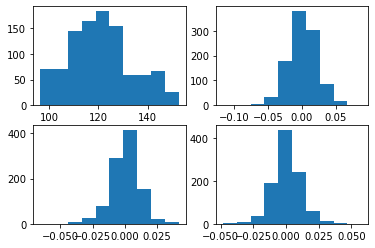

In [7]:
# 2.1 A histogram for each column (hint: four histograms total)
plt.subplot(2,2,1)
#plt.title('A Histogram of Close_ETF Data Set')
plt.hist(df['Close_ETF'])
plt.subplot(2,2,2)
#plt.title('A Histogram of Oil Data Set')
plt.hist(df['oil'])
plt.subplot(2,2,3)
#plt.title('A Histogram of Gold Data Set')
plt.hist(df['gold'])
plt.subplot(2,2,4)
#plt.title('A Histogram of JPM Data Set')
plt.hist(df['JPM'])

array([[<AxesSubplot:title={'center':'Close_ETF'}>,
        <AxesSubplot:title={'center':'oil'}>],
       [<AxesSubplot:title={'center':'gold'}>,
        <AxesSubplot:title={'center':'JPM'}>]], dtype=object)

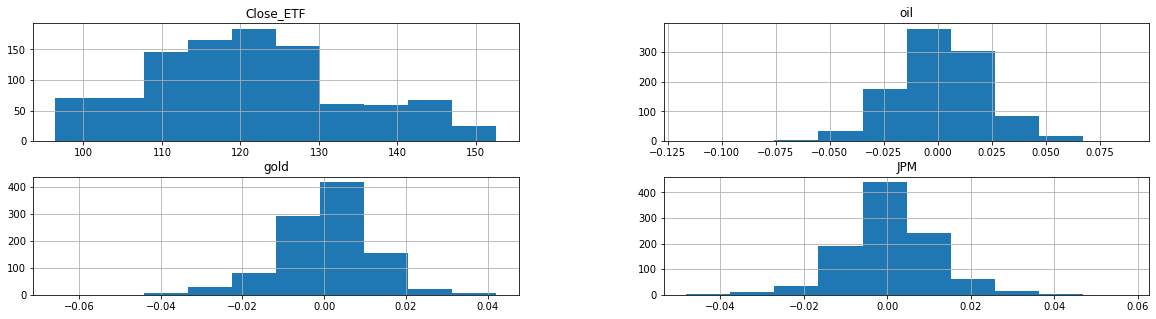

In [8]:
df.hist(figsize= (20, 5))

<AxesSubplot:xlabel='JPM', ylabel='Density'>

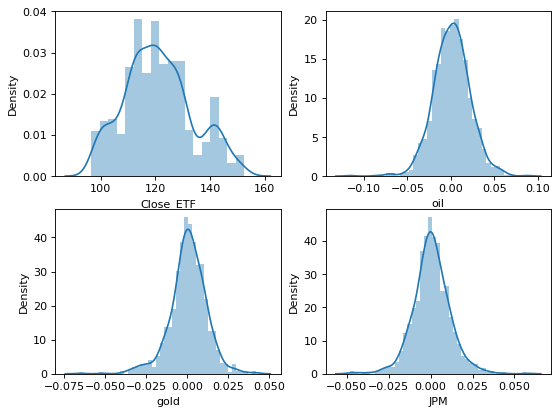

In [9]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

plt.subplot(2,2,1)
sns.distplot(df['Close_ETF'], hist=True, kde=True)
plt.subplot(2,2,2)
sns.distplot(df['oil'], hist=True, kde=True)
plt.subplot(2,2,3)
sns.distplot(df['gold'], hist=True, kde=True)
plt.subplot(2,2,4)
sns.distplot(df['JPM'], hist=True, kde=True)



2) A time series plot for each column (hint: use the series “1, 2, 3, …, 1000” as the horizontal axis; four plots total)

<AxesSubplot:ylabel='Close_ETF'>

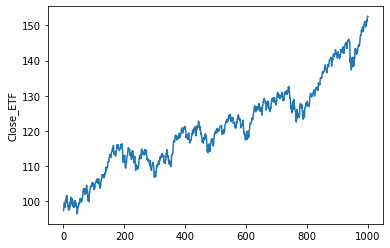

In [10]:
#Time series plot for ETF
sns.lineplot(data=df['Close_ETF'])

<AxesSubplot:ylabel='oil'>

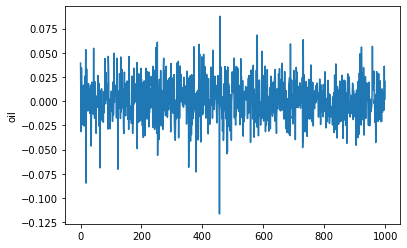

In [11]:
#Time series plot for oil
sns.lineplot(data=df['oil'])

<AxesSubplot:ylabel='gold'>

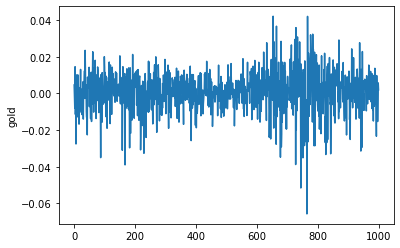

In [12]:
#Time series plot for gold
sns.lineplot(data=df['gold'])

<AxesSubplot:ylabel='JPM'>

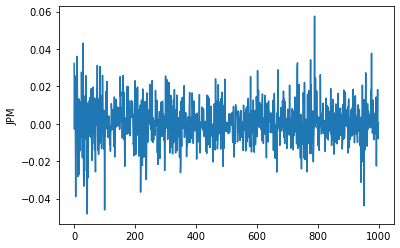

In [13]:
#Time series plot for JPM
sns.lineplot(data=df['JPM'])

3) A time series plot for all four columns (hint: one plot including four “curves” and each “curve” describes one column)

<AxesSubplot:>

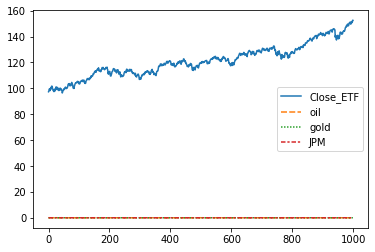

In [14]:
#Time series plot for All columns
sns.lineplot(data=df)

4) Three scatter plots to describe the relationships between the ETF column and the OIL column; between the ETF column and the GOLD column; between the ETF column and the JPM column, respectively

<AxesSubplot:xlabel='Close_ETF', ylabel='oil'>

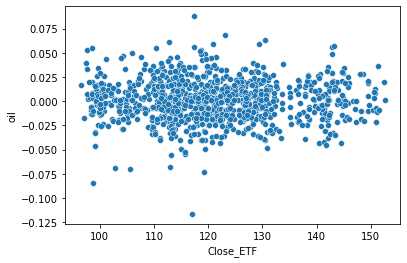

In [15]:
#Scatter plots plot between the ETF column and the OIL column
sns.scatterplot(data=df, x="Close_ETF", y="oil")

Text(0.5, 0, 'Close_ETF')

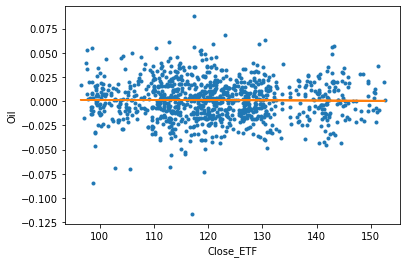

In [16]:
plt.plot(df["Close_ETF"], df["oil"], '.')
m, b = np.polyfit(df["Close_ETF"], df["oil"], 1)
plt.plot(df["Close_ETF"], m*df["Close_ETF"] + b)
plt.ylabel('Oil')
plt.xlabel('Close_ETF')

<AxesSubplot:xlabel='Close_ETF', ylabel='gold'>

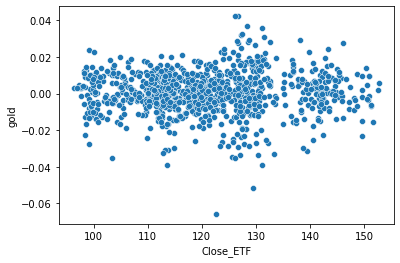

In [17]:
#Scatter plots plot between the ETF column and the GOLD column
sns.scatterplot(data=df, x="Close_ETF", y="gold")

Text(0.5, 0, 'Close_ETF')

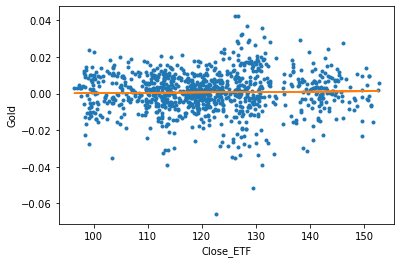

In [18]:
plt.plot(df["Close_ETF"], df["gold"], '.')
m, b = np.polyfit(df["Close_ETF"], df["gold"], 1)
plt.plot(df["Close_ETF"], m*df["Close_ETF"] + b)
plt.ylabel('Gold')
plt.xlabel('Close_ETF')

<AxesSubplot:xlabel='Close_ETF', ylabel='JPM'>

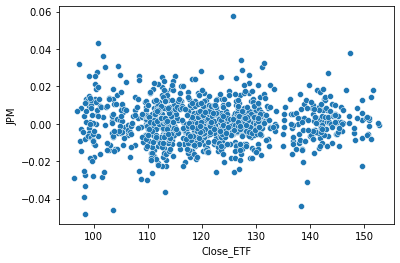

In [19]:
#Scatter plots plot between the ETF column and the JPM column
sns.scatterplot(data=df, x="Close_ETF", y="JPM")

Text(0.5, 0, 'Close_ETF')

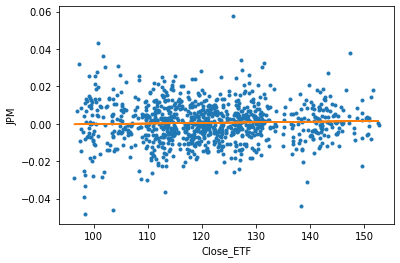

In [20]:
plt.plot(df["Close_ETF"], df["JPM"], '.')
m, b = np.polyfit(df["Close_ETF"], df["JPM"], 1)
plt.plot(df["Close_ETF"], m*df["Close_ETF"] + b)
plt.ylabel('JPM')
plt.xlabel('Close_ETF')

#### Part 3: What distribution does your data follow
#### Requirements – Propose an assumption/a hypothesis regarding the type of distribution each column of the data set may follow (i.e., the ETF, OIL, GOLD, and JPM column), based on the plots from Part 2. Then verify or object that assumption/hypothesis with appropriate tests (for example, normality test). You may use any software to perform those tests.

------------- ETF Histogram -------------


<AxesSubplot:xlabel='Close_ETF', ylabel='Density'>

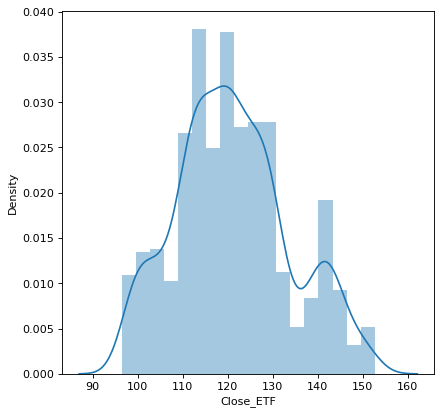

In [21]:
print("------------- ETF Histogram -------------")
figure(figsize=(6, 6), dpi=80)
sns.distplot(df['Close_ETF'], hist=True, kde=True)

-------------------- Normality test for ETF ------------------------
------------- QQ Plot -------------
-------------------- Chisquare ------------------------
Statistics=1302.829, p=0.000
Sample does not look Gaussian (reject H0)
------------------ Shapiro-Wilk ------------------------
Statistics=0.980, p=0.000
Sample does not look Gaussian (reject H0)


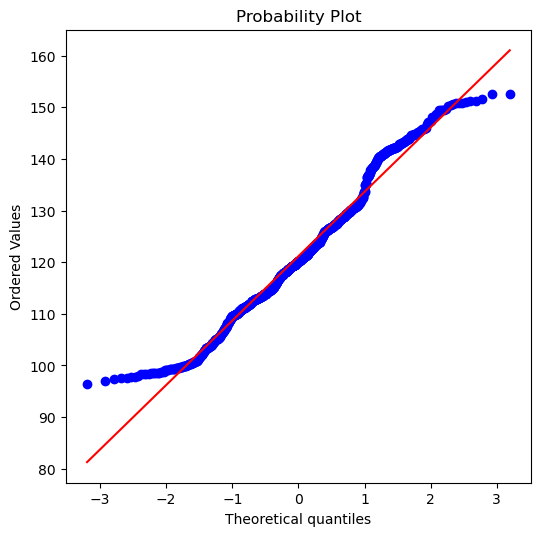

In [22]:
import numpy as np
import pylab
import scipy.stats as stats
from scipy.stats import chisquare

print('-------------------- Normality test for ETF ------------------------')
print("------------- QQ Plot -------------")
figure(figsize=(6, 6), dpi=100)
stats.probplot(df["Close_ETF"], dist="norm", plot=pylab)

print('-------------------- Chisquare ------------------------') 
stat, p1 = chisquare(df["Close_ETF"])
print('Statistics=%.3f, p=%.3f' % (stat, p1))

alpha = 0.05
if p1 > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('------------------ Shapiro-Wilk ------------------------')    

stat, p2 = shapiro(df["Close_ETF"])
print('Statistics=%.3f, p=%.3f' % (stat, p2))

alpha = 0.05
if p2 > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

------------- Oil Histogram -------------


<AxesSubplot:xlabel='oil', ylabel='Density'>

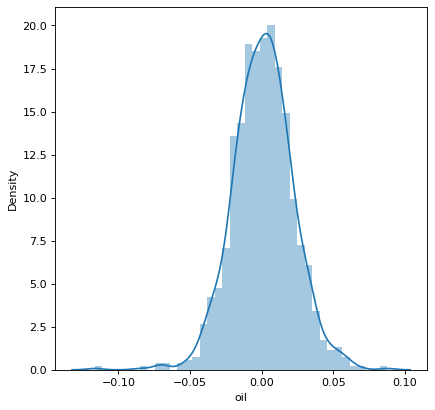

In [23]:
print("------------- Oil Histogram -------------")
figure(figsize=(6, 6), dpi=80)
sns.distplot(df['oil'], hist=True, kde=True)

-------------------- Normality test for Oil ------------------------
------------- QQ Plot -------------
-------------------- Chisquare ------------------------
Statistics=431.505, p=1.000
Sample looks Gaussian (fail to reject H0)
------------------ Shapiro-Wilk ------------------------
Statistics=0.989, p=0.000
Sample does not look Gaussian (reject H0)


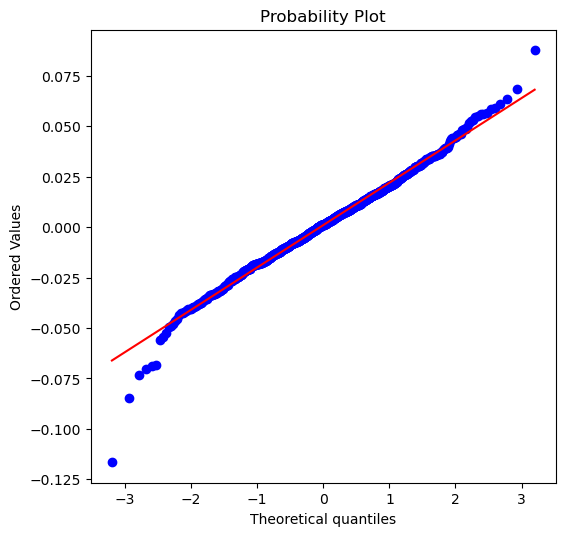

In [24]:
print('-------------------- Normality test for Oil ------------------------') 
print("------------- QQ Plot -------------")
figure(figsize=(6, 6), dpi=100)
stats.probplot(df["oil"], dist="norm", plot=pylab)

print('-------------------- Chisquare ------------------------') 
stat, p1 = chisquare(df["oil"])
print('Statistics=%.3f, p=%.3f' % (stat, p1))
alpha = 0.05
if p1 > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('------------------ Shapiro-Wilk ------------------------')

stat, p2 = shapiro(df["oil"])
print('Statistics=%.3f, p=%.3f' % (stat, p2))

alpha = 0.05
if p2 > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

------------- Gold Histogram -------------


<AxesSubplot:xlabel='gold', ylabel='Density'>

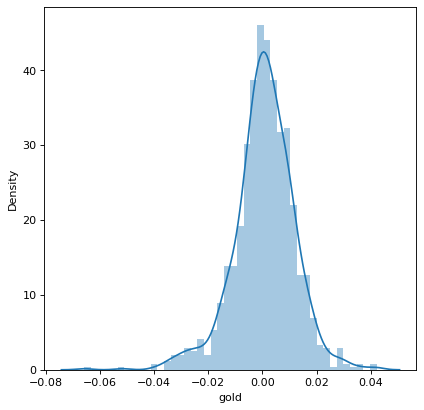

In [25]:
print("------------- Gold Histogram -------------")
figure(figsize=(6, 6), dpi=80)
sns.distplot(df['gold'], hist=True, kde=True)

-------------------- Normality test for Gold ------------------------
------------- QQ Plot -------------
-------------------- Chisquare ------------------------
Statistics=192.077, p=1.000
Sample looks Gaussian (fail to reject H0)
------------------ Shapiro-Wilk ------------------------
Statistics=0.969, p=0.000
Sample does not look Gaussian (reject H0)


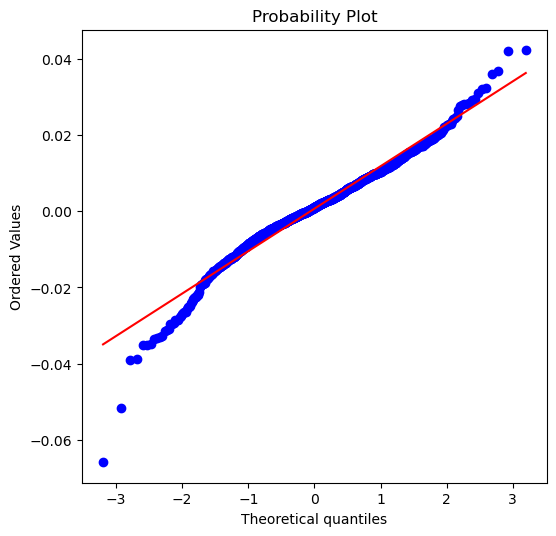

In [26]:
print('-------------------- Normality test for Gold ------------------------') 
print("------------- QQ Plot -------------")
figure(figsize=(6, 6), dpi=100)
stats.probplot(df["gold"], dist="norm", plot=pylab)

print('-------------------- Chisquare ------------------------')
stat, p = chisquare(df["gold"])
print('Statistics=%.3f, p=%.3f' % (stat, p1))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('------------------ Shapiro-Wilk ------------------------') 
stat, p = shapiro(df["gold"])
print('Statistics=%.3f, p=%.3f' % (stat, p2))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

------------- JPM Histogram -------------


<AxesSubplot:xlabel='JPM', ylabel='Density'>

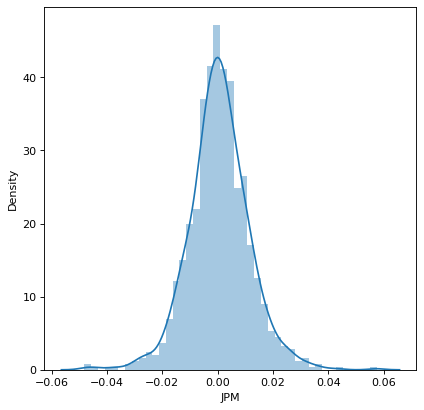

In [27]:
print("------------- JPM Histogram -------------")
figure(figsize=(6, 6), dpi=80)
sns.distplot(df['JPM'], hist=True, kde=True)

-------------------- Normality test for JPM ------------------------
------------- QQ Plot -------------
-------------------- Chisquare ------------------------
Statistics=228.584, p=1.000
Sample looks Gaussian (fail to reject H0)
------------------ Shapiro-Wilk ------------------------
Statistics=0.980, p=0.000
Sample does not look Gaussian (reject H0)


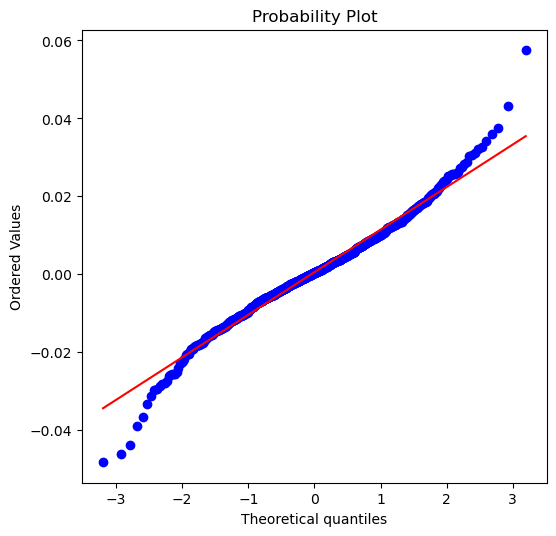

In [28]:
print('-------------------- Normality test for JPM ------------------------') 
print("------------- QQ Plot -------------")
figure(figsize=(6, 6), dpi=100)
stats.probplot(df["JPM"], dist="norm", plot=pylab)

print('-------------------- Chisquare ------------------------')
stat, p = chisquare(df["JPM"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
print('------------------ Shapiro-Wilk ------------------------')    
stat, p = shapiro(df["JPM"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

#### 4. Break your data into small groups and let them discuss the importance of the Central Limit Theorem
#### Requirements – Consider the ETF column (1000 values) as the population (x), and do the follows. Any software may be used.

In [29]:

#Sequential split of data
def split_data_seq(data, size):
    return np.array_split(data, size)

#To print sample mean
def print_mean(data):
    for index, value in enumerate(data):
        print("group" + str(index+1) + "---> " + str(np.mean(value)))

# Return array of sample mean        
def mean_array(data):
    mean_value = []
    for value in data:
        mean_value.append(np.mean(value))
    return mean_value

# mean of sample means  
def mean_mean(data):
    return np.mean(mean_array(data))

# standard deviation of mean
def std_of_samples(data):
    return np.std(mean_array(data))

# For spliting data randomly 
def split_data_random(data, size, groups):
    random_array = []
    for i in range(groups):
        random_array.append(choices(data, k=size))
    return random_array

1) Calculate the mean 𝜇𝑥 and the standard deviation 𝜎𝑥 of the population.

In [30]:
print('Mean of ETF column', np.mean(df['Close_ETF']))
print('Standard Deviation ETF column', np.std(df['Close_ETF']))

Mean of ETF column 121.1529600120001
Standard Deviation ETF column 12.563503845944297


2) Break the population into 50 groups sequentially and each group includes 20 values.

In [31]:
#Spliting 50 groups sequentially
seq_data_50 = split_data_seq(df['Close_ETF'], 50)

3) Calculate the sample mean (𝑥) of each group. Draw a histogram of all the sample means. Comment on the distribution of these sample means, i.e., use the histogram to assess the normality of the data consisting of these sample means.

In [32]:
#sample mean
print("Sample mean (𝑥) of each group")
print_mean(seq_data_50)

Sample mean (𝑥) of each group
group1---> 99.32100080000002
group2---> 99.55399975000002
group3---> 99.15400055
group4---> 102.55050039999999
group5---> 103.29199995000002
group6---> 105.09350015
group7---> 106.75099974999998
group8---> 111.6580009
group9---> 114.49950014999997
group10---> 114.40050045000001
group11---> 112.77649960000001
group12---> 112.28599980000001
group13---> 111.80899929999998
group14---> 113.27149915
group15---> 109.9474991
group16---> 110.14300039999998
group17---> 112.53550034999998
group18---> 112.0754997
group19---> 117.78150055
group20---> 120.0504997
group21---> 118.20800089999997
group22---> 119.98099934999998
group23---> 119.76750025000001
group24---> 116.80299985000003
group25---> 117.24199984999998
group26---> 120.55450105
group27---> 121.09150044999998
group28---> 123.40999985
group29---> 122.7170002
group30---> 120.61099994999998
group31---> 120.50799975000002
group32---> 125.79700005
group33---> 126.88300015
group34---> 127.30250020000003
group35--->

<AxesSubplot:ylabel='Density'>

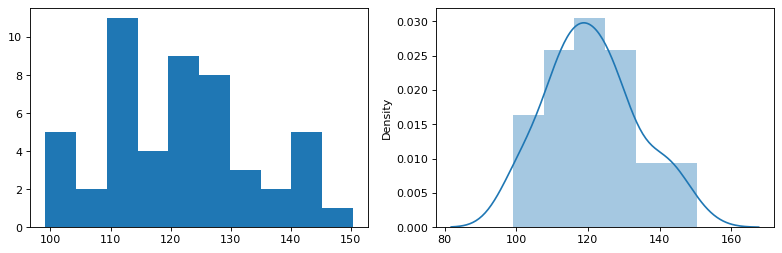

In [33]:
#Histogram of mean of samples
mean_seq_data_50 = mean_array(seq_data_50)
figure(figsize=(12, 8), dpi=80)
plt.subplot(2,2,1)
plt.hist(mean_seq_data_50)
plt.subplot(2,2,2)
sns.distplot(mean_seq_data_50, hist=True, kde=True)

Total Sample :  1000


<AxesSubplot:ylabel='Density'>

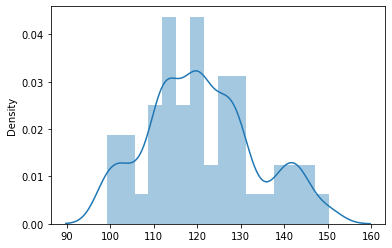

In [34]:
#Histogram of mean of samples for 1000 sample
array_of_mean = []
for i in range(20):
    seq_data = split_data_seq(df['Close_ETF'], 50)
    for value in seq_data:
        array_of_mean.append(np.mean(value))

print("Total Sample : ", len(array_of_mean))
sns.distplot(array_of_mean, hist=True, kde=True)

Statistics=1287.459, p=0.000
Sample does not look Gaussian (reject H0)


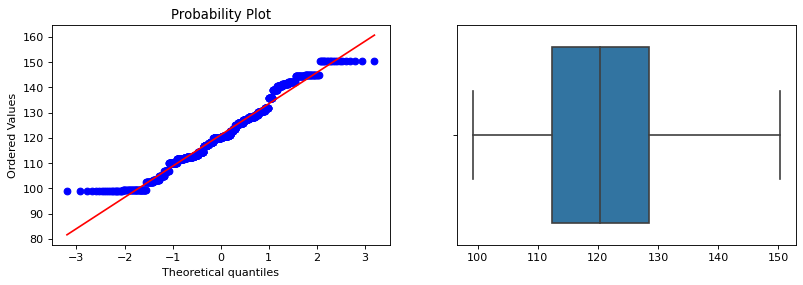

In [35]:
figure(figsize=(12, 8), dpi=80)
plt.subplot(2,2,1)
stats.probplot(array_of_mean, dist="norm", plot=pylab)
plt.subplot(2,2,2)
sns.boxplot(array_of_mean)
stat, p1 = chisquare(array_of_mean)
print('Statistics=%.3f, p=%.3f' % (stat, p1))
alpha = 0.05
if p1 > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

4) Calculate the mean (𝜇𝑥) and the standard deviation (𝜎𝑥) of the data including these sample means. Make a comparison between 𝜇𝑥 and 𝜇𝑥 , between 𝜎𝑥√𝑛 and 𝜎𝑥 . Here, 𝑛 is the number of sample means calculated from Item 3) above.

In [36]:
print("Mean (𝜇𝑥) : " + str(mean_mean(seq_data_50)))
print("Standard deviation (𝜎𝑥) : " + str(std_of_samples(seq_data_50)))

Mean (𝜇𝑥) : 121.15296001199998
Standard deviation (𝜎𝑥) : 12.489175897769007


In [37]:
print("Mean 𝜇𝑥: ", np.mean(df['Close_ETF'], axis=0) ,"and mean of samples : ", mean_mean(seq_data_50))
print("𝜎𝑥/√𝑛 : ", (np.std(df['Close_ETF'])/math.sqrt(50)) ,"and standard deviation of samples : ", std_of_samples(seq_data_50))

Mean 𝜇𝑥:  121.1529600120001 and mean of samples :  121.15296001199998
𝜎𝑥/√𝑛 :  1.7767477529860964 and standard deviation of samples :  12.489175897769007


5) Are the results from Items 3) and 4) consistent with the Central Limit Theorem? Why?

6) Break the population into 10 groups sequentially and each group includes 100 values.

In [38]:
#Spliting 10 groups sequentially
seq_data_100 = split_data_seq(df['Close_ETF'], 10)

7) Repeat Items 3) ~ 5).

In [39]:
print("Sample mean (𝑥) of each group")
print_mean(seq_data_100)

Sample mean (𝑥) of each group
group1---> 100.77430028999999
group2---> 110.48050028
group3---> 112.01809938999999
group4---> 114.51720014000003
group5---> 118.40030003999999
group6---> 121.67680029999993
group7---> 125.78560010999992
group8---> 128.01269997999995
group9---> 135.3920996399999
group10---> 144.47199995


<AxesSubplot:ylabel='Density'>

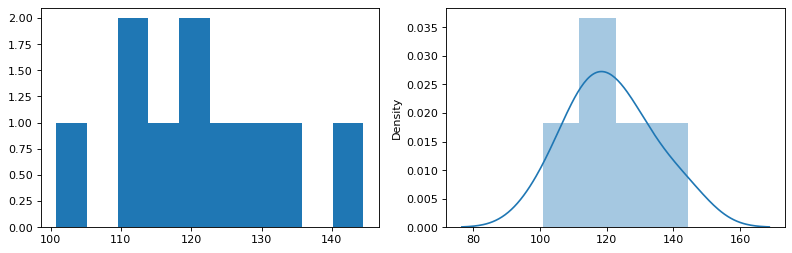

In [40]:
#Histogram of sample mean
mean_seq_data_100 = mean_array(seq_data_100)
figure(figsize=(12, 8), dpi=80)
plt.subplot(2,2,1)
plt.hist(mean_seq_data_100)
plt.subplot(2,2,2)
sns.distplot(mean_seq_data_100, hist=True, kde=True)

Total Sample :  1000


<AxesSubplot:ylabel='Density'>

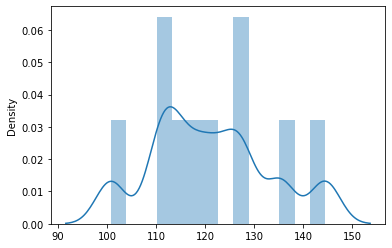

In [41]:
#Histogram of sample mean for 1000 size
array_of_mean = []
for i in range(100):
    seq_data = split_data_seq(df['Close_ETF'], 10)
    for value in seq_data:
        array_of_mean.append(np.mean(value))

print("Total Sample : ", len(array_of_mean))
sns.distplot(array_of_mean, hist=True, kde=True)

Statistics=1221.241, p=0.000
Sample does not look Gaussian (reject H0)


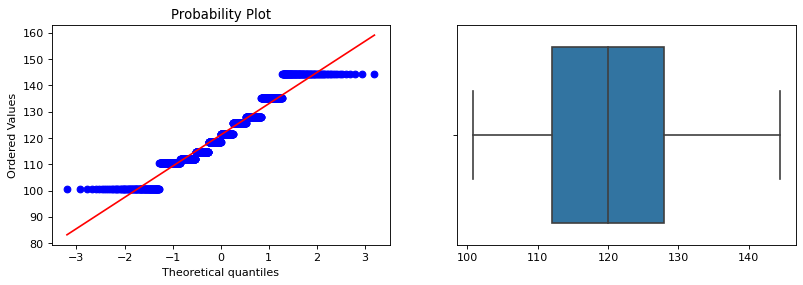

In [42]:
figure(figsize=(12, 8), dpi=80)
plt.subplot(2,2,1)
stats.probplot(array_of_mean, dist="norm", plot=pylab)
plt.subplot(2,2,2)
sns.boxplot(array_of_mean)
stat, p1 = chisquare(array_of_mean)
print('Statistics=%.3f, p=%.3f' % (stat, p1))
alpha = 0.05
if p1 > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [43]:
print("Mean (𝜇𝑥) : " + str(mean_mean(seq_data_100)))
print("Standard deviation (𝜎𝑥) : " + str(std_of_samples(seq_data_100)))

Mean (𝜇𝑥) : 121.15296001199997
Standard deviation (𝜎𝑥) : 12.16375686089257


In [44]:
print("Mean 𝜇𝑥: ", np.mean(df['Close_ETF'], axis=0) ,"and mean of samples : ", mean_mean(seq_data_100))
print("𝜎𝑥/√𝑛 : ", (np.std(df['Close_ETF'])/math.sqrt(100)) ,"and standard deviation of samples : ", std_of_samples(seq_data_100))

Mean 𝜇𝑥:  121.1529600120001 and mean of samples :  121.15296001199997
𝜎𝑥/√𝑛 :  1.2563503845944297 and standard deviation of samples :  12.16375686089257


8) Generate 50 simple random samples or groups (with replacement) from the population. The size of each sample is 20, i.e., each group includes 20 values.

In [45]:
#Spliting 50 simple random groups
random_data_50 = split_data_random(df['Close_ETF'], 20, 50)

9) Repeat Items 3) ~ 5).

In [46]:
print("Sample mean (𝑥) of each group")
print_mean(random_data_50)

Sample mean (𝑥) of each group
group1---> 122.09550014999999
group2---> 119.25349920000001
group3---> 119.56350044999999
group4---> 123.49799979999997
group5---> 121.88350064999997
group6---> 121.59399825
group7---> 120.73499914999998
group8---> 117.61800075
group9---> 119.0505004
group10---> 123.3884994
group11---> 121.5965001
group12---> 123.68500029999998
group13---> 115.92249975
group14---> 121.17749975000001
group15---> 119.14549945000002
group16---> 123.25200004999999
group17---> 122.9570003
group18---> 125.2139999
group19---> 119.81250029999998
group20---> 122.34850005000001
group21---> 116.1905007
group22---> 123.55850074999998
group23---> 122.58950155
group24---> 118.63749955
group25---> 123.56699895
group26---> 121.81700020000001
group27---> 126.42550055
group28---> 115.03750045
group29---> 122.12599985
group30---> 120.07600049999999
group31---> 123.80299994999999
group32---> 123.28649975
group33---> 118.18250005
group34---> 120.06250005
group35---> 118.84849999999999
group36-

<AxesSubplot:ylabel='Density'>

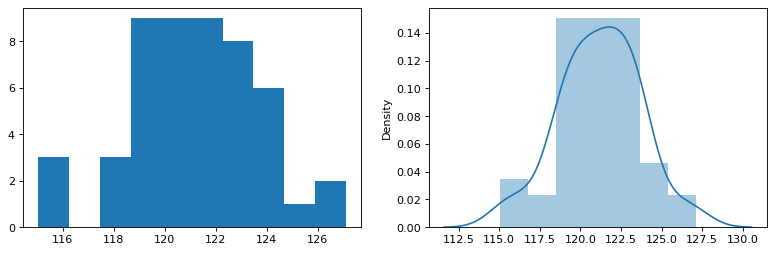

In [47]:
#Histogram of sample mean
mean_random_data_50 = mean_array(random_data_50)
figure(figsize=(12, 8), dpi=80)
plt.subplot(2,2,1)
plt.hist(mean_random_data_50)
plt.subplot(2,2,2)
sns.distplot(mean_random_data_50, hist=True, kde=True)

Total Sample :  1000


<AxesSubplot:ylabel='Density'>

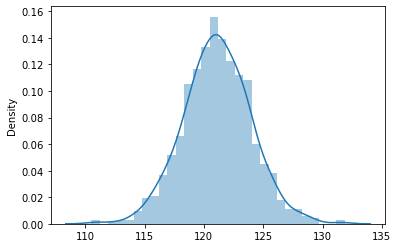

In [48]:
#Histogram of sample mean of 1000 sample
array_of_mean = []
for i in range(20):
    seq_data = split_data_random(df['Close_ETF'], 20, 50)
    for value in seq_data:
        array_of_mean.append(np.mean(value))

print("Total Sample : ", len(array_of_mean))
sns.distplot(array_of_mean, hist=True, kde=True)

Statistics=67.674, p=1.000
Sample looks Gaussian (fail to reject H0)


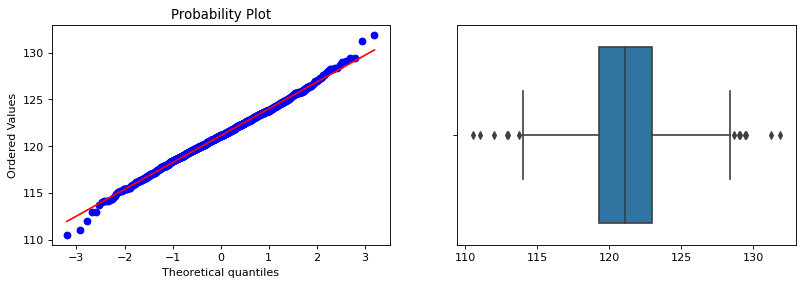

In [49]:
figure(figsize=(12, 8), dpi=80)
plt.subplot(2,2,1)
stats.probplot(array_of_mean, dist="norm", plot=pylab)
plt.subplot(2,2,2)
sns.boxplot(array_of_mean)
stat, p1 = chisquare(array_of_mean)
print('Statistics=%.3f, p=%.3f' % (stat, p1))
alpha = 0.05
if p1 > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [50]:
print("Mean (𝜇𝑥) : " + str(mean_mean(random_data_50)))
print("Standard deviation (𝜎𝑥) : " + str(std_of_samples(random_data_50)))

Mean (𝜇𝑥) : 121.18418995899998
Standard deviation (𝜎𝑥) : 2.475131410511565


In [51]:
print("Mean 𝜇𝑥: ", np.mean(df['Close_ETF'], axis=0) ,"and mean of samples : ", mean_mean(random_data_50))
print("𝜎𝑥/√𝑛 : ", (np.std(df['Close_ETF'])/math.sqrt(50)) ,"and standard deviation of samples : ", std_of_samples(random_data_50))

Mean 𝜇𝑥:  121.1529600120001 and mean of samples :  121.18418995899998
𝜎𝑥/√𝑛 :  1.7767477529860964 and standard deviation of samples :  2.475131410511565


10) Generate 10 simple random samples or groups (with replacement) from the population. The size of each sample is 100, i.e., each group includes 100 values.

In [52]:
#Spliting 10 simple random samples or groups
random_data_100 = split_data_random(df['Close_ETF'], 100, 10)

11) Repeat Items 3) ~ 5).

In [53]:
print("Sample mean (𝑥) of each group")
print_mean(random_data_100)

Sample mean (𝑥) of each group
group1---> 120.63419991
group2---> 120.93630001
group3---> 122.02019985000001
group4---> 118.29990045000001
group5---> 120.48350021
group6---> 119.14050017
group7---> 122.69549968
group8---> 120.19740027999998
group9---> 122.46149992
group10---> 121.56449995000001


<AxesSubplot:ylabel='Density'>

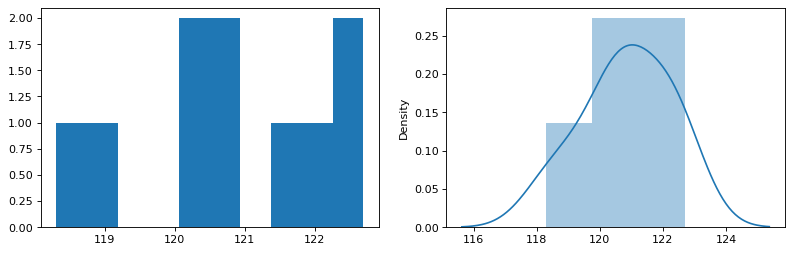

In [54]:
#Histogram of mean of samples
mean_random_data_100 = mean_array(random_data_100)
figure(figsize=(12, 8), dpi=80)
plt.subplot(2,2,1)
plt.hist(mean_random_data_100)
plt.subplot(2,2,2)
sns.distplot(mean_random_data_100, hist=True, kde=True)

Total Sample :  1000


<AxesSubplot:ylabel='Density'>

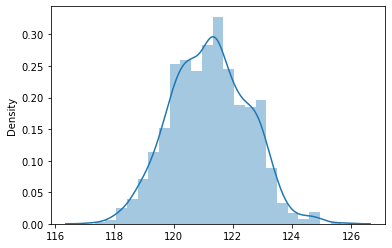

In [55]:
#Histogram of mean of 1000 samples
array_of_mean = []
for i in range(100):
    seq_data = split_data_random(df['Close_ETF'], 100, 10)
    for value in seq_data:
        array_of_mean.append(np.mean(value))

print("Total Sample : ", len(array_of_mean))
sns.distplot(array_of_mean, hist=True, kde=True)

Statistics=13.750, p=1.000
Sample looks Gaussian (fail to reject H0)


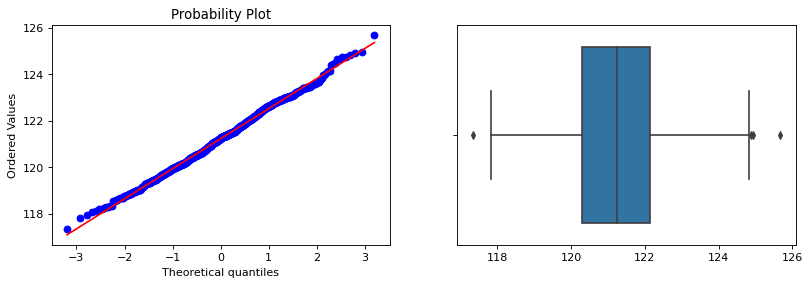

In [56]:
figure(figsize=(12, 8), dpi=80)
plt.subplot(2,2,1)
stats.probplot(array_of_mean, dist="norm", plot=pylab)
plt.subplot(2,2,2)
sns.boxplot(array_of_mean)
stat, p1 = chisquare(array_of_mean)
print('Statistics=%.3f, p=%.3f' % (stat, p1))
alpha = 0.05
if p1 > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [57]:
print("Mean (𝜇𝑥) : " + str(mean_mean(random_data_100)))
print("Standard deviation (𝜎𝑥) : " + str(std_of_samples(random_data_100)))

Mean (𝜇𝑥) : 120.84335004300002
Standard deviation (𝜎𝑥) : 1.3387255116009957


In [58]:
print("Mean 𝜇𝑥: ", np.mean(df['Close_ETF'], axis=0) ,"and mean of samples : ", mean_mean(random_data_100))
print("𝜎𝑥/√𝑛 : ", (np.std(df['Close_ETF'])/math.sqrt(100)) ,"and standard deviation of samples : ", std_of_samples(random_data_100))

Mean 𝜇𝑥:  121.1529600120001 and mean of samples :  120.84335004300002
𝜎𝑥/√𝑛 :  1.2563503845944297 and standard deviation of samples :  1.3387255116009957


### Part 5: Construct a confidence interval with your data
Requirements –
1) Pick up one of the 10 simple random samples you generated in Step 10) of Part 4, construct an appropriate 95% confidence interval of the mean 𝜇.

2) Pick up one of the 50 simple random samples you generated in Step 8) of Part 4, construct an appropriate 95% confidence interval of the mean 𝜇.

3) In Part 1, you have calculated the mean 𝜇 of the population (the entire ETF column) using Excel function. Do the two intervals from 1) and 2) above include (the true value of) the mean 𝜇? Which one is more accurate? Why?

In [59]:
# Part 5.1
import scipy.stats as st

df_etf = df['Close_ETF']
df_etf = df['Close_ETF']
etf_sample_100 = df_etf.sample(n=100, replace=True, random_state=100)

In [60]:
# Confidence Interval is given by:- x +/- t*(s/√n)

# where
#    x: sample mean(122.156)
#    t: t-value that corresponds to the confidence level 0.05 (1.960)
#    s: sample standard deviation(13.64)
#    n: sample size(100)

122.156 - 1.960*(np.std(etf_sample_100)/np.sqrt(len(etf_sample_100))),122.156 + 1.960*(np.std(etf_sample_100)/np.sqrt(len(etf_sample_100)))

# 95% Confidence Interval: 122.15 ± 2.67
# the range is 124.83 - 119.48 = 5.36

(119.48113668779801, 124.830863312202)

In [61]:
# Part 5.2
etf_sample_20 = df_etf.sample(n=20, replace=True,  random_state=100)
125.422 - 1.960*(np.std(etf_sample_20)/np.sqrt(len(etf_sample_20))),125.422 + 1.960*(np.std(etf_sample_20))
# using the scipy.norm.interval() method
st.norm.interval(alpha=0.95, loc=np.mean(etf_sample_20), scale=st.sem(etf_sample_20))
# we used the scipy.t.interval() method here since, the number of data points in this sample is only 20
st.t.interval(alpha=0.95, df = 19, loc=np.mean(etf_sample_20), scale=st.sem(etf_sample_20))
np.std(etf_sample_20)

12.200426718275422

In [62]:
# wilcoxon test since the sample doesn't follow a normal distribution

#x <- c(119.860001,
# 126.209999,
# 131.470001,
# 138.580002,
# 136.83999599999999,
# 102.940002,
# 138.669998,
# 140.53999299999998,
# 110.519997,
# 140.740005,
# 138.080002,
# 99.620003,
# 123.150002,
# 132.520004,
# 119.529999,
# 127.900002,
# 127.730003,
# 111.860001,
# 127.379997,
# 114.300003)

# > wilcox.test(x, mu=122.156100, conf.int = T)

# alternative hypothesis: true location is not equal to 122.1561
# 95 percent confidence interval:
# 119.620 <-> 132.395

# the range is 132.395 - 119.62 = 12.77

In [63]:
# Part 5.3
# Reference : https://www.statology.org/confidence-intervals-python/
#             https://www.youtube.com/watch?v=MUD390jtgQs

# Online calculator : https://www.mathsisfun.com/data/confidence-interval-calculator.html

# Observation :

# 121.152960 is the population mean and yes it is included in both the intervals calculated above
# the confidence interval constructed using the first sample gives more accurate result, since the population size 
# is greater in that case

### Part 6: Form a hypothesis and test it with your data
Requirements –
1) Use the same sample you picked up in Step 1) of Part 5 to test 𝑯𝟎: 𝝁=𝟏𝟎𝟎 vs. 𝑯𝒂: 𝝁≠𝟏𝟎𝟎 at the significance level 0.05. What’s your conclusion?

2) Use the same sample you picked up in Step 2) of Part 5 to test 𝑯𝟎: 𝝁=𝟏𝟎𝟎 vs. 𝑯𝒂: 𝝁≠𝟏𝟎𝟎 at the significance level 0.05. What’s your conclusion?

3) Use the same sample you picked up in Step 2) of Part 5 to test 𝑯𝟎: 𝝈=𝟏𝟓 vs. 𝑯𝒂: 𝝈≠𝟏𝟓 at the significance level 0.05. What’s your conclusion?

4) Use the same sample you picked up in Step 2) of Part 5 to test 𝑯𝟎: 𝝈=𝟏𝟓 vs. 𝑯𝒂: 𝝈<𝟏𝟓 at the significance level 0.05. What’s your conclusion?

In [64]:
# 6.1
meanSampData = np.mean(etf_sample_100)
hypMean = 100
n = 100
std_pop = np.std(df_etf)
np.mean(etf_sample_100)

122.15610052000004

In [65]:
# We went with the z-test since the popluation std deviation is known which is 12.569 and the sample size is >30

# even though z-test assumes normal distribution and the data is not normally distributed, the sample size 
# (100 in this case) is large enough to conduct the test

# Now the formula for z - value is 

z = (meanSampData-hypMean)/(std_pop/np.sqrt(n))
z

17.635287728393052

In [66]:
# Method 1(using p-value)
# Using the P-value approach: The p-value is p=0 and since 0<0.05
# it is concluded that the null hypothesis is rejected.
# https://mathcracker.com/z-test-for-one-mean

# Method 2(using critical values): 
# this is a 2 sided test
# value of z at .05 making it .025 for 2 sided we know from z table z = (+ 1.96 to -1.96)
# as calculated z score 17.63 is greater than 1.96 (tabular z score), we reject the null hypothesis
# Observed z-value = 17.63
# Critical value = 1.96
# Reference : https://github.com/sharmasw/Data-Science-with-python/blob/master/Statistics%20Notebooks/Hypothesis%20Testing.ipynb
#             https://www.youtube.com/watch?v=kd6zKBa9Rfk
#             https://www.statisticshowto.com/probability-and-statistics/find-critical-values/
# Online calculator : https://mathcracker.com/z-test-for-one-mean

In [67]:
# 6.2
meanSampData = np.mean(etf_sample_20)
hypMean = 100
n = 20
std_sam = np.std(etf_sample_20)
pop_mean = 121.152
T = (meanSampData-pop_mean)/(std_sam/np.sqrt(n))
T

1.5651930219220662

In [68]:
# Observations: for t test

# this is a 2 sided test
# value of t at .05 making it .025 for 2 sided we know from t table t = (+ -) 2.093
# as calculated t value 1.565 is lesser than 2.093, we failed to reject the null hypothesis
# Reference https://www.statisticshowto.com/probability-and-statistics/t-distribution/t-score-formula/
# Observations : for wilcoxon test
# References https://sixsigmastudyguide.com/1-sample-wilcoxon-non-parametric-hypothesis-test/
# http://www.sthda.com/english/wiki/one-sample-wilcoxon-signed-rank-test-in-r        

# x <- c(119.860001,
# 126.209999,
# 131.470001,
# 138.580002,
# 136.83999599999999,
# 102.940002,
# 138.669998,
# 140.53999299999998,
# 110.519997,
# 140.740005,
# 138.080002,
# 99.620003,
# 123.150002,
# 132.520004,
# 119.529999,
# 127.900002,
# 127.730003,
# 111.860001,
# 127.379997,
# 114.300003)
# > wilcox.test(x, mu = 100, alternative = "two.sided")
#    Wilcoxon signed rank test
# data:  x
# V = 209, p-value = 3.815e-06
# alternative hypothesis: true location is not equal to 100

In [69]:
# 6.3

# https://www.itl.nist.gov/div898/handbook/eda/section3/eda358.htm
# Using the Chi-Square method(two tailed)
etf_sample_20 = df_etf.sample(n=20, replace=True,  random_state=100)
N = len(etf_sample_20)
stdSampData = np.std(etf_sample_20)
hypStd = 15 

T = [(N-1) * ((stdSampData/hypStd)**2)]
T

# https://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm
# reject if greater than 32.852  and less than 8.907
# Hence we failed to reject the null hypothesis
# But for random_state = 0 the null hypothesis is getting rejected

[12.569590355787406]

In [70]:
# 6.4
# Using the Chi-Square method one tailed 

N = 20
stdSampData = np.std(etf_sample_20)
hypStd = 15
T = [(N-1) * ((stdSampData/hypStd)**2)]
T

# https://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm
# reject if less than 10.117
# Observations: Failed to reject the Null hypothesis 

[12.569590355787406]

### Part 7: Compare your data with a different data set
Requirements –
1) Consider the entire Gold column as a random sample from the first population, and the entire Oil column as a random sample from the second population. Assuming these two samples be drawn independently, form a hypothesis and test it to see if the Gold and Oil have equal means in the significance level 0.05.

2) Subtract the entire Gold column from the entire Oil column and generate a sample of differences. Consider this sample as a random sample from the target population of differences between Gold and Oil. Form a hypothesis and test it to see if the Gold and Oil have equal means in the significance level 0.05.

3) Consider the entire Gold column as a random sample from the first population, and the entire Oil column as a random sample from the second population. Assuming these two samples be drawn independently, form a hypothesis and test it to see if the Gold and Oil have equal standard deviations in the significance level 0.05.

In [71]:
# 7.1
# manual formula method
x = np.array(df['oil'])
y = np.array(df['gold'])

t = (np.mean(x)-np.mean(y))/np.sqrt(((np.std(x)*np.std(x))/len(x))+((np.std(y)*np.std(y))/len(y)))
pval = st.t.sf(np.abs(t), 1000-1)*2

t , pval
# https://www.socscistatistics.com/pvalues/tdistribution.aspx

# References:-
# https://www.youtube.com/watch?v=0Pd3dc1GcHc
# https://www.youtube.com/watch?v=8aaIdXENNJI
# https://github.com/bhattbhavesh91/GA_Sessions/blob/master/t_test_independence/T_Test_Sales.ipynb

# Observations:-
# We failed to reject the null hypothesis (the means of oil and gold are equal) for 0.05 significance level

(0.4856094792948105, 0.6273505577888034)

In [72]:
# 7.2
from researchpy import ttest as rpTtest
ttest_rel(df['oil'], df['gold'])

# Observations: 

# In the example we find a t-value of 0.5413 with a significance of 0.58 or 58% 
# This means that there is a 58% chance of a t-value of less than -0.5413 or a t-value of more than 0.5413, 
# hence we failed to reject the null hypothesis 

# With a usual 0.05 significance level we consider this chance to be so high, 
# that most likely there is actually not a significant difference in the population as well 

# References:

# https://www.youtube.com/watch?v=DZyDbEzaiK0
# https://www.youtube.com/watch?v=mizwZNj2aZA

# manual formual mehtod 

d = df['oil'] - df['gold']
mean_d = np.mean(d)
std_d = np.std(d)
d_sqrd = d*d

t = np.sum(d)/np.sqrt((1000*np.sum(d_sqrd)-(np.sum(d)*np.sum(d)))/(998))
t

# the critical value for significance level 0.05 and dof 999 is 1.96
# since 0.541 is between + or - 1.96 (we failed to reject the null hypothesis)

0.5410599236152893

In [73]:
# 7.3

var_oil = np.var(x) 
var_gold = np.var(y)
var_oil, var_gold
F = (np.power(var_oil,2))/np.power(var_gold,2)
F

# Reference : https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/f-test/
#             https://mathcracker.com/f-critical-values#results
# Observations
# Critical f-values: 	FL​=0.883 and FU​=1.132
# since the F value is towards the right of the critical value, we are in the rejection region
# hence we reject the null hypothesis

12.187479283391776

### Part 8: Fitting the line to the data.
#### Consider the data including the ETT column and Gold column only. Using any software

In [74]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_harvey_collier
pdInputData = pd.read_excel("data.xlsx")
pdInputData.rename(columns={"Close_ETF" : "DailyETFReturns", "oil": "DailyRelativeChangeOilPrice", \
                            "gold": "DailyRelativeChangeGoldPrice", "JPM": "DailyJPMStockReturns"}, inplace = True)
pdInputDataP8 = pdInputData[['DailyETFReturns', 'DailyRelativeChangeGoldPrice']].copy()
pdInputDataP8.head()

,DailyETFReturns,DailyRelativeChangeGoldPrice
0,97.349998,0.004668
1,97.750000,-0.001366
2,99.160004,-0.007937
3,99.650002,0.014621
4,99.260002,-0.011419


Starting points of the graph are on x axis:-0.065804741 on y axis: 96.419998


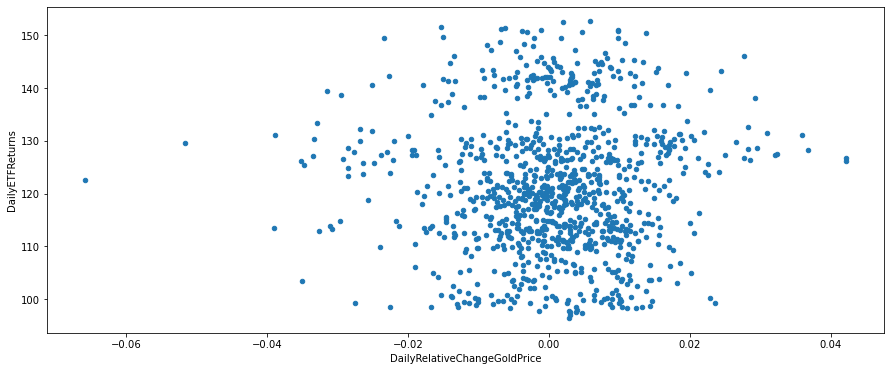

In [75]:
#1) Draw a scatter plot of ETF (Y) vs. Gold (X). Is there any linear relationship between them which can be observed from the scatter plot?
pdInputDataP8.plot.scatter(x="DailyRelativeChangeGoldPrice", y ="DailyETFReturns", figsize=(15,6))
print("Starting points of the graph are on x axis:{} on y axis: {}".format(pdInputDataP8.DailyRelativeChangeGoldPrice.min(), pdInputDataP8.DailyETFReturns.min()))

In [76]:
#2) Calculate the coefficient of correlation between ETF and Gold and interpret it.
def get_Correlation_coefficient(x, y):
    n = len(x)
    return (  ( n * np.sum(x*y) )  -  ( np.sum(x) * np.sum(y) )  ) \
           / np.sqrt( ( ( n * np.sum( x**2) ) - (np.sum(x))**2 ) * ( ( n * np.sum(y**2) ) - (np.sum(y))**2 ) )

# Get x and y input values
x = pdInputDataP8.DailyRelativeChangeGoldPrice
y = pdInputDataP8.DailyETFReturns

r = get_Correlation_coefficient(x, y)
print("The Pearson’s Correlation coefficient r between ETF and Gold is: ", r)

The Pearson’s Correlation coefficient r between ETF and Gold is:  0.02299557007605459


The slope of line=25.604389324427277 and the intercept=121.13598849889823


Text(0.5, 1.0, 'Scatter plot: ETF Vs Gold')

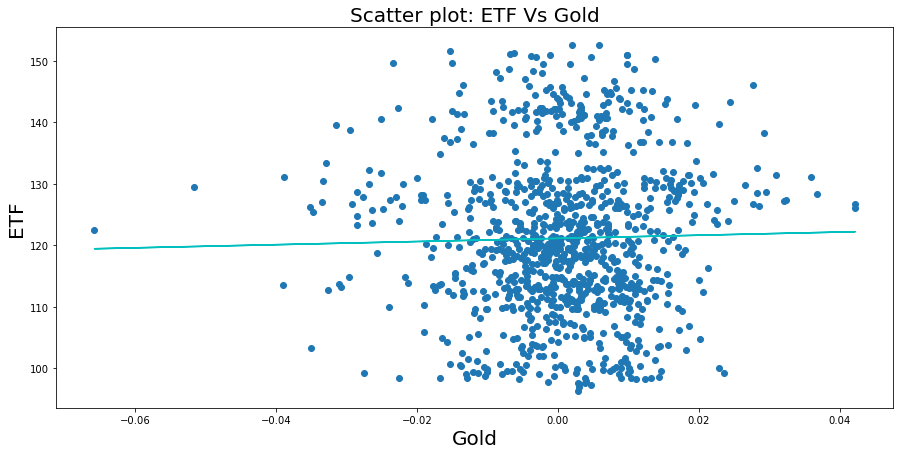

In [77]:
#3) Fit a regression line (or least squares line, best fitting line) to the scatter plot. What are the intercept and slope of this line? How to interpret them?
def get_mean(serVariableValues):
    return serVariableValues.mean()

def get_slope(x, y):
    
    # Calculate x bar and y bar
    x_bar = get_mean(x)  # x bar
    y_bar = get_mean(y)  # y bar
    
    return  np.sum( (x-x_bar) * (y - y_bar) ) / np.sum( (x-x_bar)**2 )

def calculate_intercept_of_the_line(y, x, floarSlope):
    return np.mean(y - floarSlope * x) #b0 = y - b1x

def get_regression_line(x, floatIntercept, floarSlope):
    return floatIntercept + floarSlope * x

def calculate_regression_line(x, y):
    
    # Calculate b0 and b1 that is intercept and slope of the line
    floarSlope = get_slope(x, y)
    floatIntercept = calculate_intercept_of_the_line(y, x, floarSlope)
    y_hat = get_regression_line(x, floatIntercept, floarSlope)
    
    
    return floarSlope, floatIntercept, y_hat
# Get x and y input values
x = pdInputDataP8.DailyRelativeChangeGoldPrice
y = pdInputDataP8.DailyETFReturns
floarSlope, floatIntercept, y_hat = calculate_regression_line(x, y)
print("The slope of line={} and the intercept={}".format(floarSlope, floatIntercept))

#pdInputDataP8.plot.scatter(x="DailyRelativeChangeGoldPrice", y ="DailyETFReturns", figsize=(15,6))
plt.figure(figsize=(15,7))
plt.scatter(x, y)             
plt.xlabel("Gold", fontsize = 20)
plt.ylabel("ETF", fontsize = 20)
plt.plot(x, y_hat, 'c')  
plt.title("Scatter plot: ETF Vs Gold", fontsize = 20)

In [78]:
#4) Conduct a two-tailed t-test with 𝐻0: 𝛽1=0.
b1=floarSlope
Beta1 = 0      # Null Hypothesis: When B1 = 0
n = len(x)
alpha = 0.01  # Is the linear relationship between ETF (Y) and Gold (X) significant at the significance level 0.01
def get_mean_square_error( y, y_hat ):
    return np.square(np.subtract(y,y_hat)).mean() 

#### Method 2:
#from sklearn.metrics import mean_squared_error
#def get_mean_square_error( y,y_hat ):
#    return mean_squared_error(y,y_hat)
def get_square_error(MSE, x):
    x_bar = get_mean(x)
    return np.sqrt(MSE) / np.sqrt(np.sum(np.square(x-x_bar)))

def get_t_score(x, y, y_hat, b1, Beta1):
    # Calculation of Mean Squared Error (MSE)
    MSE = get_mean_square_error( y, y_hat )
    # Calculation of Squared Error 
    SEb1 = get_square_error(MSE, x)
    return (b1 - Beta1) / SEb1  

def get_p_value_from_t_score(t_score):
    return stats.t.sf(np.abs(t_score), n-1)*2  # two-sided pvalue = Prob(abs(t_score) > t_score)

t_score =  get_t_score(x, y, y_hat, b1, Beta1) # t-statistic for H0: B1 = 0 
print("Hence t_score is: ", t_score)

p_value = get_p_value_from_t_score(t_score)
print("Got p value using t-score as: ", p_value)

def check_assumption(alpha, p_value):

    if (p_value > alpha) :
        print('Same distributions (failed to reject H0)')
    else:
        print('Different distributions (reject H0)')

check_assumption(alpha, p_value)

Hence t_score is:  0.727376117653451
Got p value using t-score as:  0.4671660043870999
Same distributions (failed to reject H0)


In [79]:
#5) Suppose that you use the coefficient of determination to assess the quality of this fitting. Is it a good model? Why or why not?
def get_residuals(y,y_hat):
    return y-y_hat

def squared_error(y,y_hat):
    return sum( np.square( get_residuals(y, y_hat) ) )

def total_sum_of_squares(y, y_bar):
    return np.sum( np.square( y - y_bar ) )

def coefficient_of_determination(y,y_hat):
    #coefficient of determination(R^2) =  1 - (RSS/ TSS)
    
    #RSS = sum of squares of residual errors 
    floatRSS = squared_error(y, y_hat)

    y_bar = get_mean(y)
    #TSS = total sum of squares (proportional to the variance of the data) 
    floatTSS = total_sum_of_squares(y, y_bar)

    return 1 - (floatRSS /  floatTSS)

# Get x and y input values
x = pdInputDataP8.DailyRelativeChangeGoldPrice
y = pdInputDataP8.DailyETFReturns

floarSlope, floatIntercept, y_hat = calculate_regression_line(x, y)

R2 = coefficient_of_determination(y,y_hat)
print("The coefficient of determination (R^2) score for a model to assess the quality of this fitting is: ", R2)

The coefficient of determination (R^2) score for a model to assess the quality of this fitting is:  0.0005287962431234083


<Figure size 1080x504 with 0 Axes>

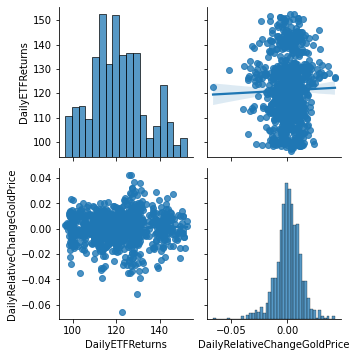

In [80]:
#6) What are the assumptions you made for this model fitting?
#Plot pairwise relationships in a dataset with one independent vairable xi and one dependent variable yi
plt.figure(figsize=(15,7))
sns.pairplot(pdInputDataP8[["DailyETFReturns", "DailyRelativeChangeGoldPrice"]], kind ='reg') 

# Save the file
plt.savefig('Part8Q6_1.png', bbox_inches='tight')
plt.show() 

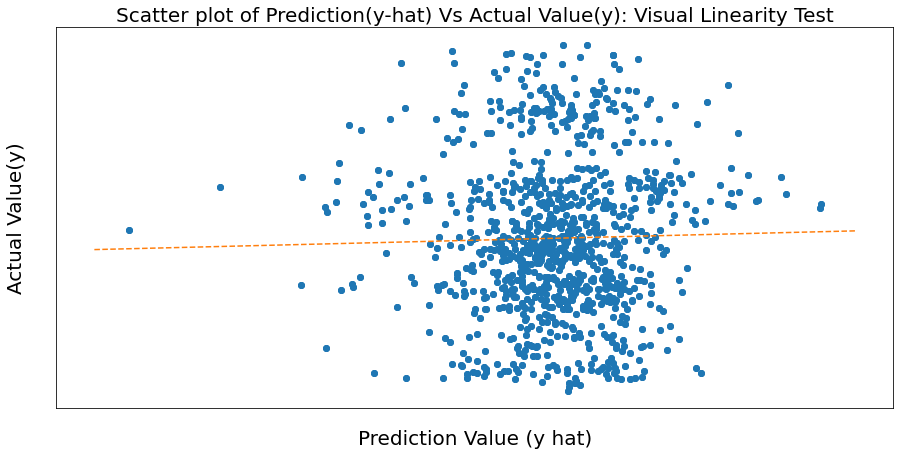

Different distributions (reject H0)
Different distributions (reject H0)


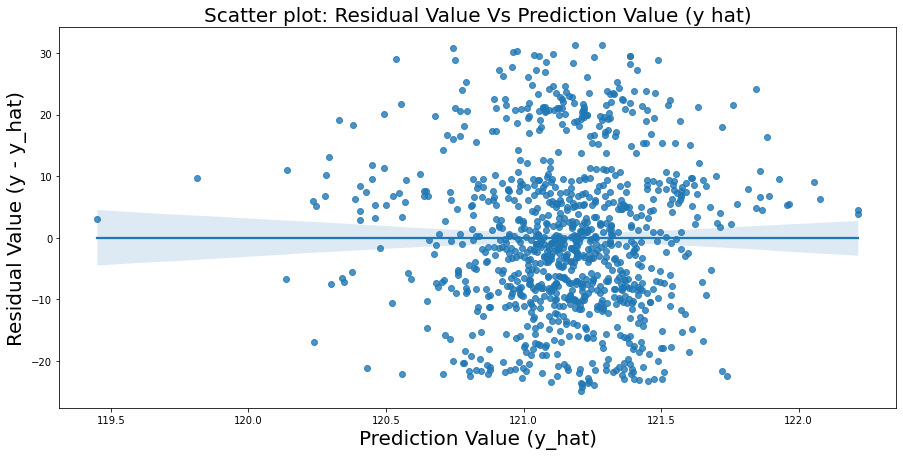

In [81]:
def abline(slope, intercept):
    # """Plot a line from slope and intercept, borrowed from https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    

#plot predicted vs actual
plt.figure(figsize=(15,7))
plt.scatter(y_hat, y)
plt.xlabel("Prediction Value (y hat)" , fontsize = 20)
plt.ylabel("Actual Value(y)", fontsize = 20)
plt.title("Scatter plot of Prediction(y-hat) Vs Actual Value(y): Visual Linearity Test", fontsize = 20)


plt.plot(y_hat, y,'o')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
abline(1,0)
plt.show()

#fit an OLS model to data
model = sm.OLS(y, sm.tools.add_constant(x))
results = model.fit()
#predict y values for training data
y_hat = model.predict(results.params)


ttest, pval = sm.stats.diagnostic.linear_rainbow(res=results) 
def check_assumption(alpha, p_value):

    if (p_value > alpha) :
        print('Same distributions (failed to reject H0)')
    else:
        print('Different distributions (reject H0)')

alpha = 0.05
check_assumption(alpha, pval)

ttest, pval = linear_harvey_collier(results)
check_assumption(alpha, pval)

### # Plot Predict Vs Residual To Check Linearity  
serResidual=get_residuals(y,y_hat)
plt.figure(figsize=(15,7))
sns.regplot(x=y_hat,y=serResidual)
plt.xlabel("Prediction Value (y_hat)", fontsize = 20)
plt.ylabel("Residual Value (y - y_hat)", fontsize = 20)
plt.title("Scatter plot: Residual Value Vs Prediction Value (y hat)", fontsize = 20)
plt.show()

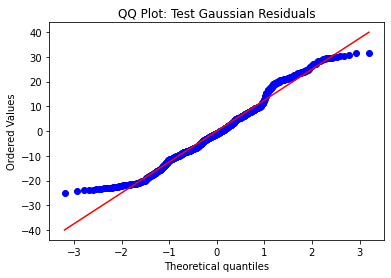

In [82]:
stats.probplot(y-y_hat, dist="norm", plot=pylab) 
pylab.title('QQ Plot: Test Gaussian Residuals') 
pylab.show()

In [83]:
#7) Given the daily relative change in the gold price is 0.005127. Calculate the 99% confidence interval of the mean daily ETF return, and the 99% prediction interval of the
def get_confidance_intervals(floatAlpha, n_1, pop_mean):
    return stats.t.interval(alpha=floatAlpha, df=n_1, loc=pop_mean)
# Given the daily relative change in the gold price is 0.005127. 
# Calculate the 99% confidence interval of the mean daily ETF return, and the 99% prediction interval of the

n_1 = len(pdInputDataP8)-1
daily_relative_cahnge = 0.005127
floatAlpha = 0.99

confidence_interval = get_confidance_intervals(floatAlpha, n_1, daily_relative_cahnge)
print("Confidance interval for gold is (with daily relative change in the gold price is 0.005127) ", confidence_interval, "For alpha: ", floatAlpha)


# Method 1: Without scaled

import scipy.stats as st
#create 99% confidence interval for same sample

n_1 = len(pdInputDataP8)-1
pop_mean = np.mean(pdInputDataP8.DailyETFReturns)
floatAlpha = 0.99
confidence_interval  = get_confidance_intervals(floatAlpha, n_1, pop_mean)
print("Confidance interval for Close_ETF is ", confidence_interval, "For alpha: ", floatAlpha)

#create 99% confidence interval for same sample

n_1 = len(pdInputDataP8)-1
pop_mean = np.mean(pdInputDataP8)
floatAlpha = 0.99

confidence_interval = get_confidance_intervals(floatAlpha, n_1, pop_mean)
print("Confidance interval for Close_ETF & gold is ", confidence_interval, "For alpha: ", floatAlpha)

Confidance interval for gold is (with daily relative change in the gold price is 0.005127)  (-2.575632637267628, 2.585886637267628) For alpha:  0.99
Confidance interval for Close_ETF is  (118.57220037473246, 123.73371964926773) For alpha:  0.99
Confidance interval for Close_ETF & gold is  (array([118.57220037,  -2.5800968 ]), array([123.73371965,   2.58142247])) For alpha:  0.99


#### Part 9: Consider the data including the ETF, Gold and Oil column. Using any software, fit a multiple  linear regression model to the data with the ETF variable as the response. Evaluate your model  with adjusted 𝑅2  ;dependent variable is the ETF and rest are independent variable.

In [84]:
from sklearn.model_selection import train_test_split
import statsmodels.tsa.api as smt
from statsmodels.stats.outliers_influence import variance_inflation_factor

pdInputData = pd.read_excel("data.xlsx")
X = pdInputData[['gold', "oil", "JPM"]]
y = pdInputData['Close_ETF']  

# Split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

results = model.fit()
print(results.params)
print(results.summary())
X_test = sm.add_constant(X_test) 
y_pred = results.predict(X_test)

const    121.046690
gold      18.293780
oil       -2.101395
JPM       30.555632
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              Close_ETF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2948
Date:                Sat, 12 Feb 2022   Prob (F-statistic):              0.829
Time:                        16:08:41   Log-Likelihood:                -3155.4
No. Observations:                 800   AIC:                             6319.
Df Residuals:                     796   BIC:                             6338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [85]:
# assumptions: 
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
R2

0.0031383509671113474

In [86]:
VIF = 1 / (1 - R2)
VIF

1.0031482312216105

In [87]:
# Incase only one input variable and output variable
pdInputData[["Close_ETF", "gold", "oil"]].corr() 

,Close_ETF,gold,oil
Close_ETF,1.000000,0.022996,-0.009045
gold,0.022996,1.000000,0.235650
oil,-0.009045,0.235650,1.000000


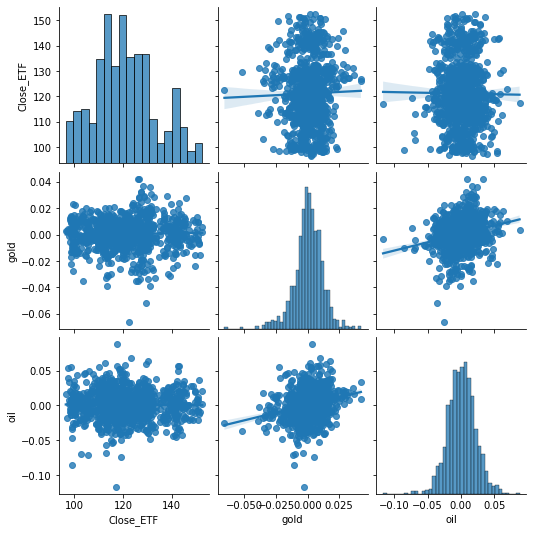

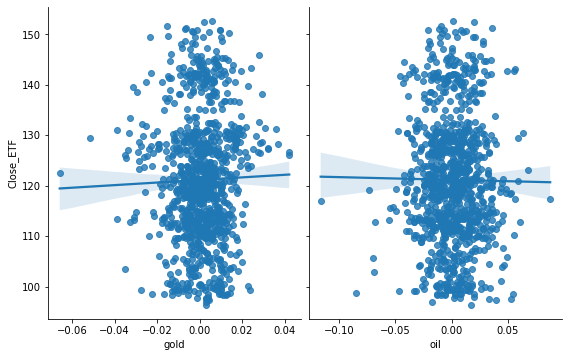

In [88]:
#Plot pairwise relationships in a dataset 
sns.pairplot(pdInputData[["Close_ETF", "gold", "oil"]], kind ='reg') 
sns.pairplot(pdInputData , x_vars=["gold", "oil"], y_vars=["Close_ETF"],
             height=5, aspect=.8, kind="reg");

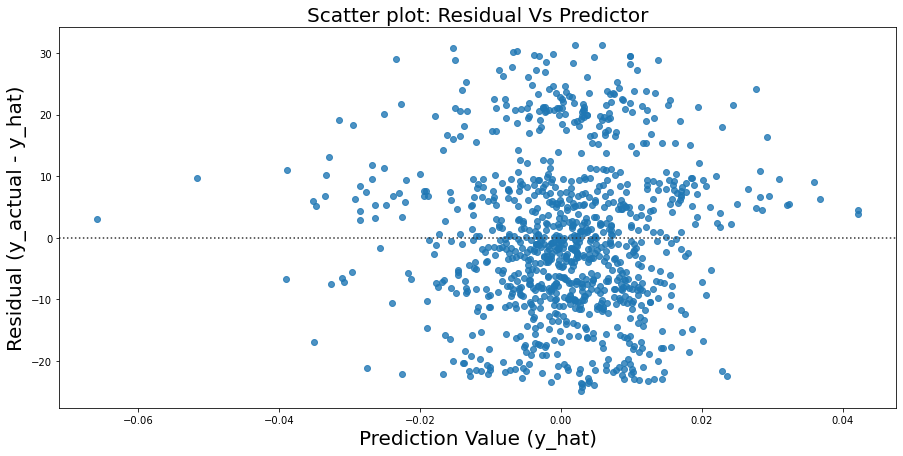

In [89]:
plt.figure(figsize=(15,7))
sns.residplot(x = 'gold',
              y = "Close_ETF", 
              data = pdInputData)
plt.xlabel("Prediction Value (y_hat)", fontsize = 20)
plt.ylabel("Residual (y_actual - y_hat)", fontsize = 20)
plt.title("Scatter plot: Residual Vs Predictor", fontsize = 20)
plt.show()

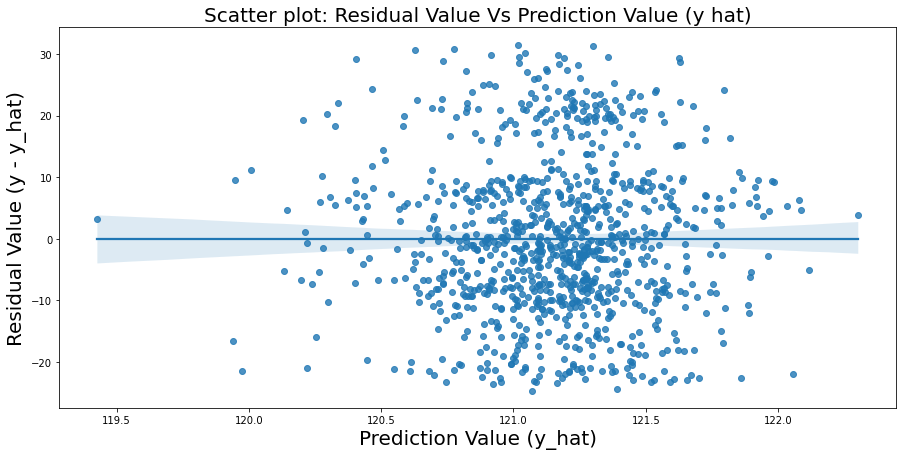

Mean of resudual is: 1.4424017535930032e-14


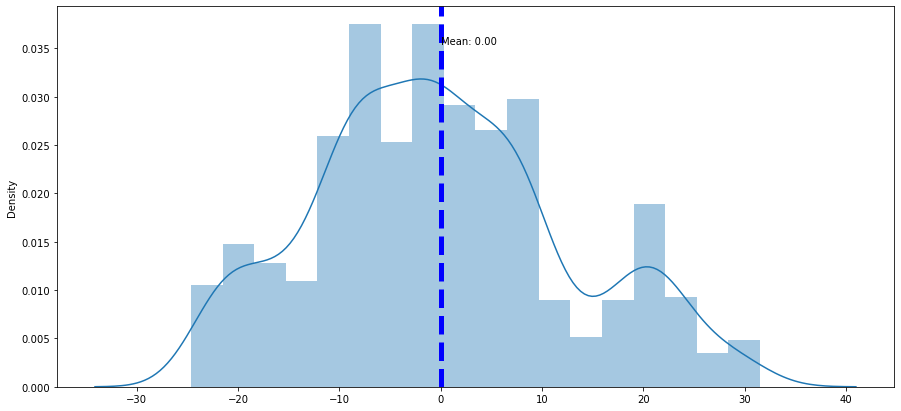

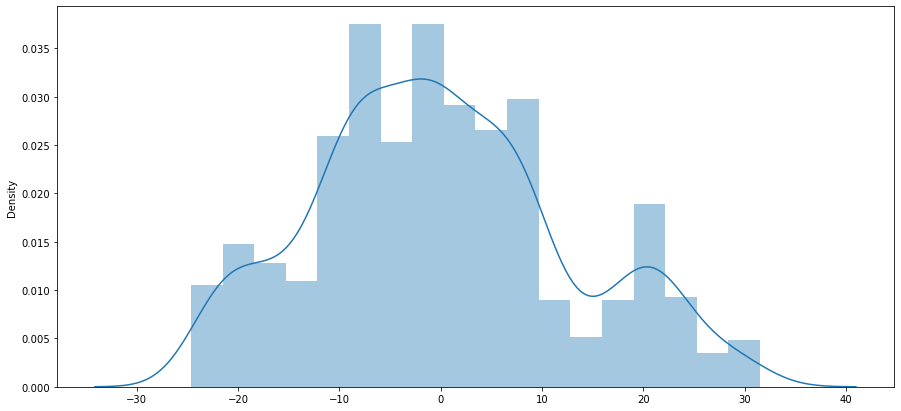

In [90]:
X = pdInputData[["gold", "oil"]]
y = pdInputData['Close_ETF']  


X_with_constant = sm.add_constant(X)
model = sm.OLS(y, X_with_constant)

results = model.fit()
results.params

# Now making prediction for the test data
# align test data for the prediction
X= sm.add_constant(X) 
y_pred = results.predict(X)
serResidual = y - y_pred
plt.figure(figsize=(15,7))
sns.regplot(x=y_pred,y=serResidual)
plt.xlabel("Prediction Value (y_hat)", fontsize = 20)
plt.ylabel("Residual Value (y - y_hat)", fontsize = 20)
plt.title("Scatter plot: Residual Value Vs Prediction Value (y hat)", fontsize = 20)
plt.show()


plt.figure(figsize=(15,7))
ax = sns.distplot(serResidual)
plt.axvline(np.mean(serResidual), color="b", linestyle="dashed", linewidth=5)
_, max_ = plt.ylim()
plt.text(        serResidual.mean() + serResidual.mean() / 10, max_ - max_ / 10, "Mean: {:.2f}".format(serResidual.mean()),
    )

plt.figure(figsize=(15,7))
sns.distplot(serResidual)
print("Mean of resudual is:", serResidual.mean())

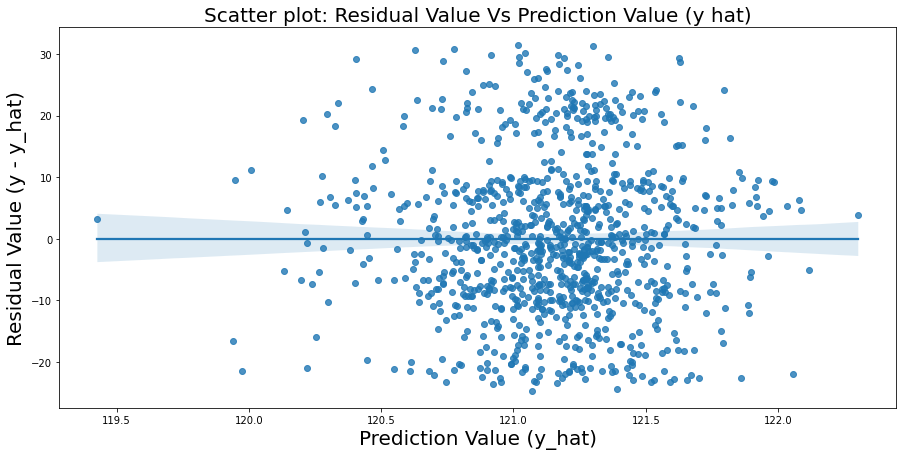

In [91]:
plt.figure(figsize=(15,7))
sns.regplot(x=y_pred,y=serResidual)
plt.xlabel("Prediction Value (y_hat)", fontsize = 20)
plt.ylabel("Residual Value (y - y_hat)", fontsize = 20)
plt.title("Scatter plot: Residual Value Vs Prediction Value (y hat)", fontsize = 20)
plt.show()

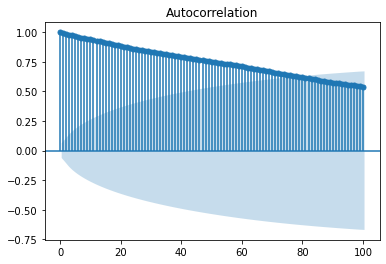

In [92]:
# In addition to above we can use following too:
acf = smt.graphics.plot_acf(serResidual, lags=100, alpha=0.05)
acf.show()

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


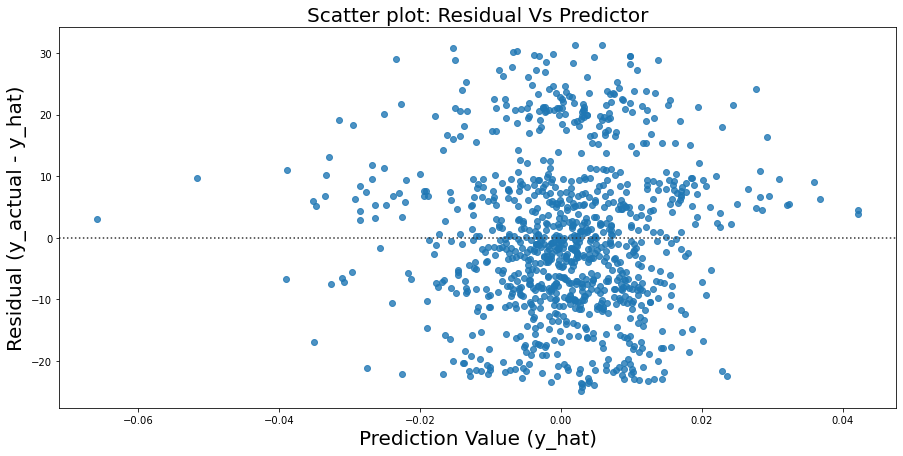

In [93]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')

    # Plotting the residuals

    plt.figure(figsize=(15,7))
    sns.residplot(x = 'gold',
                  y = "Close_ETF", 
                  data = pdInputData)
    plt.xlabel("Prediction Value (y_hat)", fontsize = 20)
    plt.ylabel("Residual (y_actual - y_hat)", fontsize = 20)
    plt.title("Scatter plot: Residual Vs Predictor", fontsize = 20)
    plt.show()
homoscedasticity_assumption(model, pdInputData[["gold", "oil"]], 
                            pdInputData["Close_ETF"])

In [94]:
R2 = r2_score(y, y_pred)
print(R2)

VIF = 1 / (1 - R2)
print(VIF)

#calculate VIF for each explanatory variable
def get_vif(X_features):    
    pdVif = pd.DataFrame()
    pdVif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    pdVif['variable'] = X.columns
    return pdVif

def get_tolerance_value(pdVif):
    pdVif = get_vif(X_features)
    return 1/pdVif['VIF'] 
X_features = pdInputData[["gold", "oil"]]
pdVif = get_vif(X_features)
pdVif['Tolerance'] = get_tolerance_value(pdVif)
pdVif

0.0007502966608660122
1.0007508600286383


,VIF,variable,Tolerance
0,1.004749,const,0.995273
1,1.058796,gold,0.944469
2,1.058796,oil,0.944469


In [95]:
X = pdInputData[['gold', "oil"]]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pdVif = pd.DataFrame({'vif': vif[0:]}, index=X.columns).T
pdVif

,gold,oil
vif,1.059952,1.059952


In [96]:
print("For Gold the tolerance is: ", 1/pdVif['gold']['vif'])
print("For Oil the tolerance is: ", 1/pdVif['oil']['vif'])

For Gold the tolerance is:  0.9434386482198436
For Oil the tolerance is:  0.9434386482198437


the r-squared is:  -92.28928671747123
the coefficient (value of a) for independent variables('gold', 'oil'), constant is:  [486.12945977 248.3574569  575.71356936]


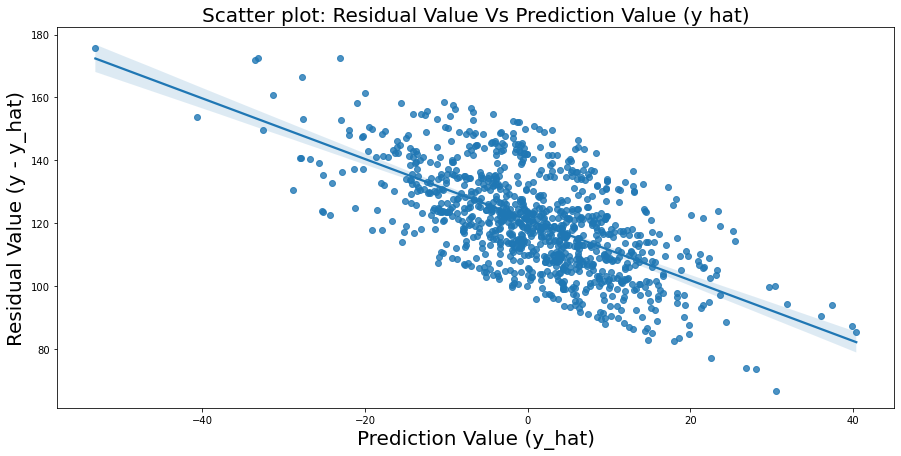

In [97]:
import scipy as sp

pdInputData = pd.read_excel("data.xlsx")
X = pdInputData[['gold', "oil", "JPM"]]
y = pdInputData['Close_ETF'] 
# Create a model y = b0 + b1x + b2x manually

def get_multilinear_best_fit_line(X, Y):
    # Use Linear Algebra to solve
    a = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
    predictedY = np.dot(X, a)

    # calculate the r-squared
    SSres = Y - predictedY
    SStot = Y - Y.mean()
    rSquared = 1 - (SSres.dot(SSres) / SStot.dot(SStot))
    print("the r-squared is: ", rSquared)
    print("the coefficient (value of a) for independent variables('gold', 'oil'), constant is: ", a)
    
    return predictedY, SSres

predictedY, SSres = get_multilinear_best_fit_line(X, y)

### # Plot Predict Vs Residual To Check Linearity  
plt.figure(figsize=(15,7))
sns.regplot(x=predictedY,y=SSres)
plt.xlabel("Prediction Value (y_hat)", fontsize = 20)
plt.ylabel("Residual Value (y - y_hat)", fontsize = 20)
plt.title("Scatter plot: Residual Value Vs Prediction Value (y hat)", fontsize = 20)
plt.show()

In [98]:
# Split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

results = model.fit()
results.params

const    121.046690
gold      18.293780
oil       -2.101395
JPM       30.555632
dtype: float64

In [99]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,gold,oil,JPM
vif,1.065874,1.078647,1.033869


In [100]:
X = pdInputData[['oil' , 'gold']]
y = pdInputData['Close_ETF']
X_with_constant = sm.add_constant(X)
model = sm.OLS(y, X_with_constant)
results = model.fit()
results.params

const    121.142725
oil       -9.126100
gold      29.622592
dtype: float64

In [101]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Close_ETF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3743
Date:                Sat, 12 Feb 2022   Prob (F-statistic):              0.688
Time:                        16:08:45   Log-Likelihood:                -3949.4
No. Observations:                1000   AIC:                             7905.
Df Residuals:                     997   BIC:                             7919.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.1427      0.399    303.856      0.000     120.360     121.925
oil           -9.1261     19.413     -0.470      0.638     -47.221      28.968
gold          29.6226     36.272      0.817      0.414     -41.555     100.800
==============================================================================
Omnibus:                       26.565   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.981
Skew:                           0.306   Prob(JB):                     1.02e-05
Kurtosis:                       2.579   Cond. No.                         92.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

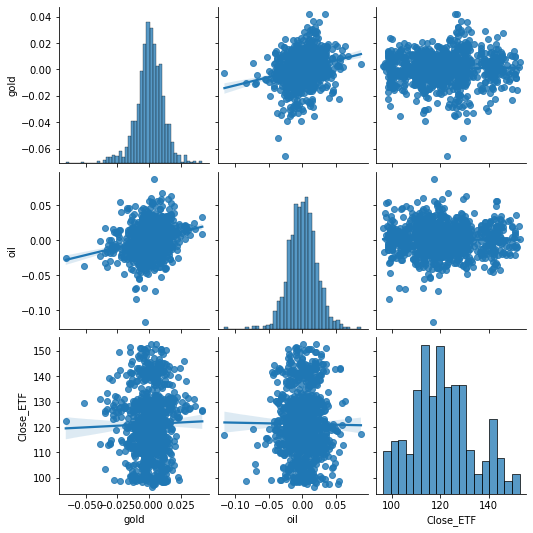

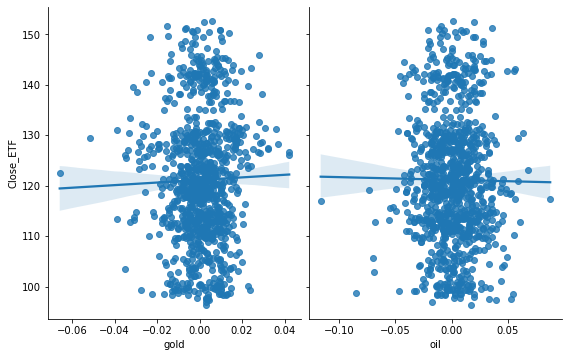

In [102]:
sns.pairplot(pdInputData[['gold', "oil", "Close_ETF"]], kind ='reg') 
sns.pairplot(pdInputData , x_vars=['gold', "oil"], y_vars=["Close_ETF"],
             height=5, aspect=.8, kind="reg")

Text(0.5, 0, 'Close_ETF')

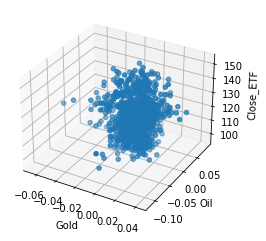

In [103]:
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X[:, 0], X[:, 1], Y)
ax.scatter(pdInputData['gold'], pdInputData["oil"], pdInputData['Close_ETF'])
ax.set_xlabel('Gold')
ax.set_ylabel('Oil')
ax.set_zlabel('Close_ETF')

In [104]:
y_pred = results.predict()
# multicolinearity/independence

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X.columns).T

,oil,gold
vif,1.059952,1.059952


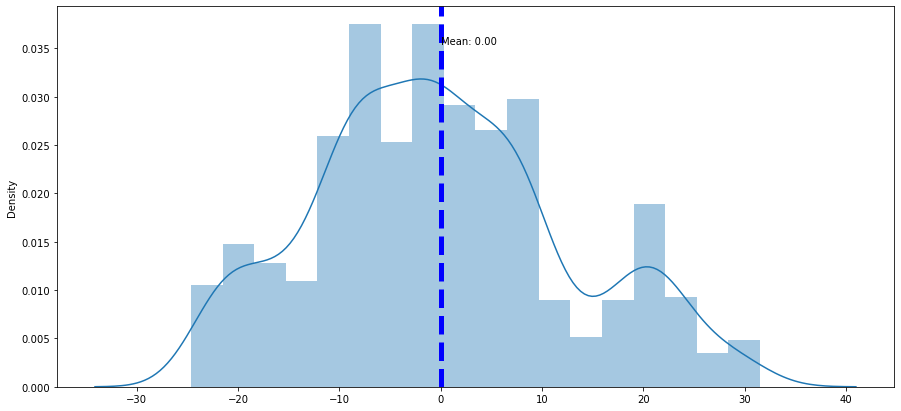

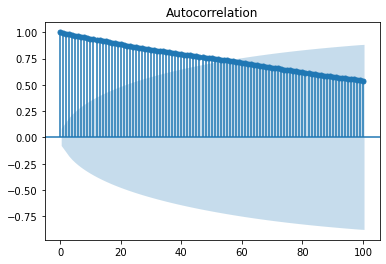

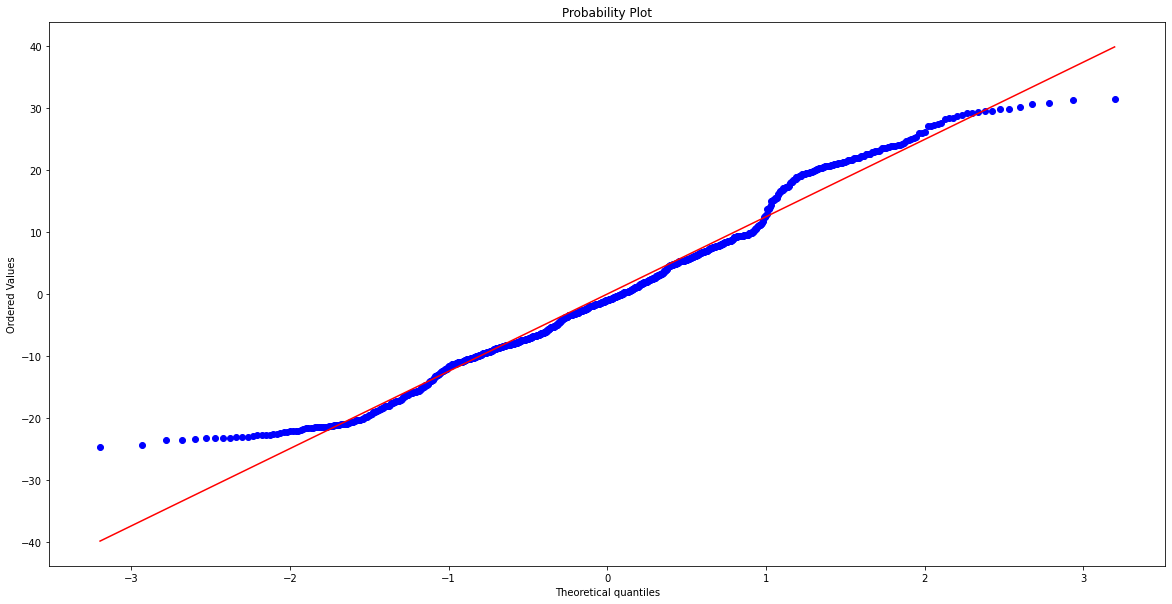

In [105]:
# normality of residuals 
plt.figure(figsize=(15,7))
serResidual = results.resid 
ax = sns.distplot(serResidual)
plt.axvline(np.mean(serResidual), color="b", linestyle="dashed", linewidth=5)
_, max_ = plt.ylim()
plt.text(        serResidual.mean() + serResidual.mean() / 10, max_ - max_ / 10, "Mean: {:.2f}".format(serResidual.mean()),
    )
acf = smt.graphics.plot_acf(serResidual, lags=100, alpha=0.01)

fig, ax = plt.subplots(figsize=(20,10))
_, (__, ___, r) = sp.stats.probplot(serResidual, plot=ax, fit=True)

In [106]:
np.mean(serResidual)

1.6513013179064727e-14

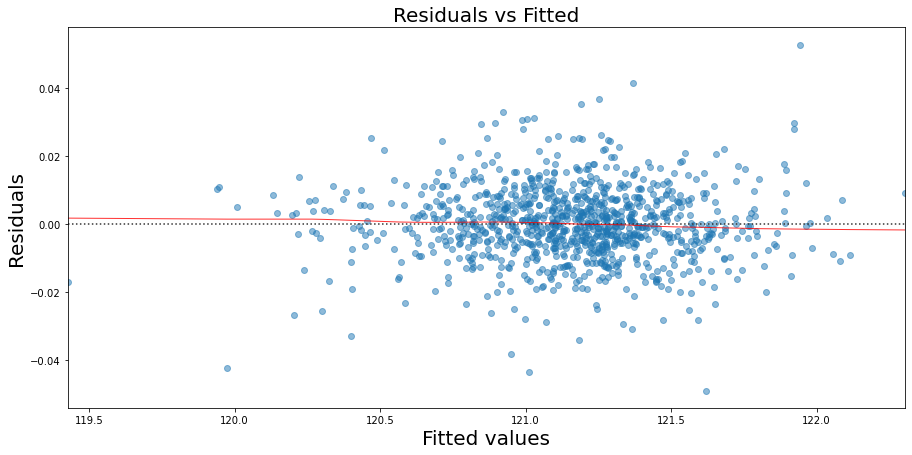

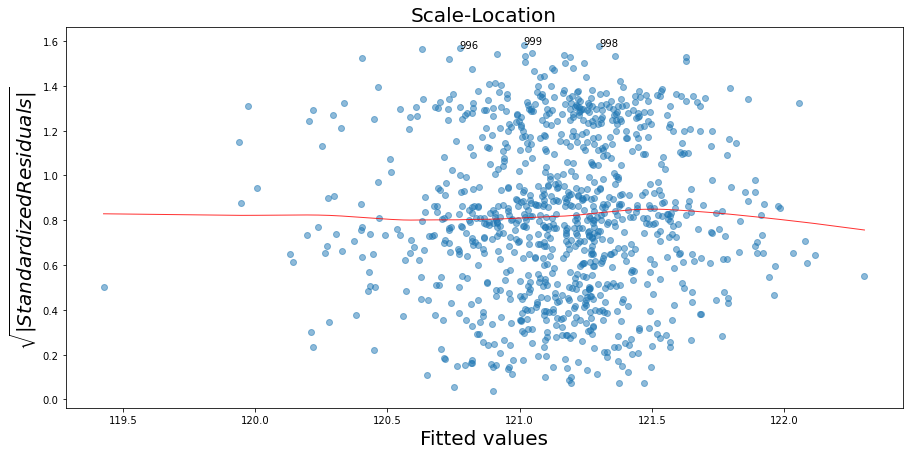

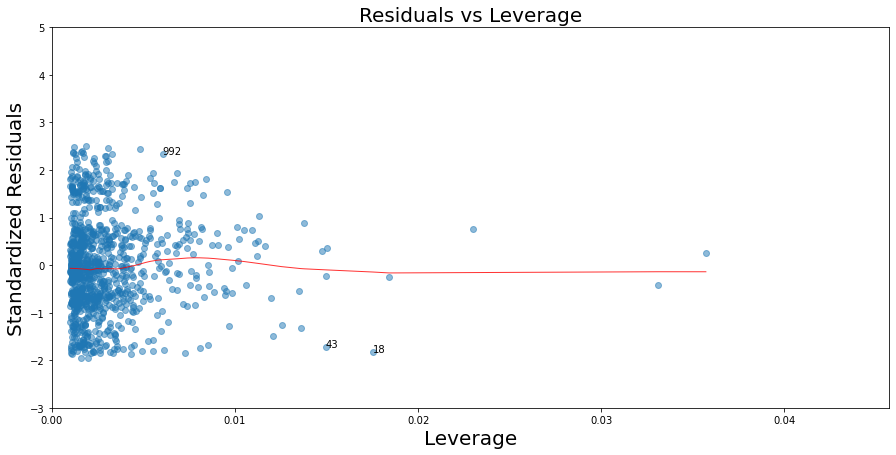

In [107]:
# Residuals vs Fitted
model_fitted_y = results.predict()
model_residuals = results.resid
model_norm_residuals = results.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_abs_resid = np.abs(model_residuals)
model_leverage = results.get_influence().hat_matrix_diag
model_cooks = results.get_influence().cooks_distance[0]


plot_lm_1 = plt.figure(figsize=(15,7))
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, pdInputData.columns[-1], \
                          data=pdInputData,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted', size = 20)
plot_lm_1.axes[0].set_xlabel('Fitted values', size = 20)
plot_lm_1.axes[0].set_ylabel('Residuals', size = 20)


plot_lm_3 = plt.figure(figsize=(15,7))
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location', size = 20)
plot_lm_3.axes[0].set_xlabel('Fitted values', size = 20)
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$', size = 20);

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
#abs_norm_resid_top_3 = abs_norm_resid[:3]
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_sq_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));
    
    
plot_lm_4 = plt.figure(figsize=(15,7))
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage', size = 20)
plot_lm_4.axes[0].set_xlabel('Leverage', size = 20)
plot_lm_4.axes[0].set_ylabel('Standardized Residuals', size = 20)

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]))